# Library Imports

In [1]:
#Importing the necessary packages.
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import missingno as msno
import math
import warnings

In [2]:
warnings.filterwarnings('ignore')

# Data Import

In [3]:
from google.colab import files
file = files.upload()  #uploading the file

Saving PCOS_data_without_infertility.xlsx to PCOS_data_without_infertility.xlsx


In [4]:
pd.set_option('display.max_columns', None)  # visualize all columns in dataframe

In [5]:
#Creating a Dataframe for our Dataset
df = pd.read_excel('PCOS_data_without_infertility.xlsx', 'Full_new')

In [6]:
df.head()

,Sl. No,Patient File No.,PCOS (Y/N),Age (yrs),Weight (Kg),Height(Cm),BMI,Blood Group,Pulse rate(bpm),RR (breaths/min),Hb(g/dl),Cycle(R/I),Cycle length(days),Marraige Status (Yrs),Pregnant(Y/N),No. of aborptions,I beta-HCG(mIU/mL),II beta-HCG(mIU/mL),FSH(mIU/mL),LH(mIU/mL),FSH/LH,Hip(inch),Waist(inch),Waist:Hip Ratio,TSH (mIU/L),AMH(ng/mL),PRL(ng/mL),Vit D3 (ng/mL),PRG(ng/mL),RBS(mg/dl),Weight gain(Y/N),hair growth(Y/N),Skin darkening (Y/N),Hair loss(Y/N),Pimples(Y/N),Fast food (Y/N),Reg.Exercise(Y/N),BP _Systolic (mmHg),BP _Diastolic (mmHg),Follicle No. (L),Follicle No. (R),Avg. F size (L) (mm),Avg. F size (R) (mm),Endometrium (mm),Unnamed: 44
0,1,1,0,28,44.6,152.0,19.300000,15,78,22,10.48,2,5,7.0,0,0,1.99,1.99,7.95,3.68,2.160326,36,30,0.833333,0.68,2.07,45.16,17.1,0.57,92.0,0,0,0,0,0,1.0,0,110,80,3,3,18.0,18.0,8.5,NaN
1,2,2,0,36,65.0,161.5,24.921163,15,74,20,11.70,2,5,11.0,1,0,60.80,1.99,6.73,1.09,6.174312,38,32,0.842105,3.16,1.53,20.09,61.3,0.97,92.0,0,0,0,0,0,0.0,0,120,70,3,5,15.0,14.0,3.7,NaN
2,3,3,1,33,68.8,165.0,25.270891,11,72,18,11.80,2,5,10.0,1,0,494.08,494.08,5.54,0.88,6.295455,40,36,0.900000,2.54,6.63,10.52,49.7,0.36,84.0,0,0,0,1,1,1.0,0,120,80,13,15,18.0,20.0,10.0,NaN
3,4,4,0,37,65.0,148.0,29.674945,13,72,20,12.00,2,5,4.0,0,0,1.99,1.99,8.06,2.36,3.415254,42,36,0.857143,16.41,1.22,36.90,33.4,0.36,76.0,0,0,0,0,0,0.0,0,120,70,2,2,15.0,14.0,7.5,NaN
4,5,5,0,25,52.0,161.0,20.060954,11,72,18,10.00,2,5,1.0,1,0,801.45,801.45,3.98,0.90,4.422222,37,30,0.810811,3.57,2.26,30.09,43.8,0.38,84.0,0,0,0,1,0,0.0,0,120,80,3,4,16.0,14.0,7.0,NaN


# Exploratory Data Analysis and Data Visualization

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541 entries, 0 to 540
Data columns (total 45 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Sl. No                  541 non-null    int64  
 1   Patient File No.        541 non-null    int64  
 2   PCOS (Y/N)              541 non-null    int64  
 3    Age (yrs)              541 non-null    int64  
 4   Weight (Kg)             541 non-null    float64
 5   Height(Cm)              541 non-null    float64
 6   BMI                     541 non-null    float64
 7   Blood Group             541 non-null    int64  
 8   Pulse rate(bpm)         541 non-null    int64  
 9   RR (breaths/min)        541 non-null    int64  
 10  Hb(g/dl)                541 non-null    float64
 11  Cycle(R/I)              541 non-null    int64  
 12  Cycle length(days)      541 non-null    int64  
 13  Marraige Status (Yrs)   540 non-null    float64
 14  Pregnant(Y/N)           541 non-null    in

## Outlier Analysis

In [8]:
df.describe()

,Sl. No,Patient File No.,PCOS (Y/N),Age (yrs),Weight (Kg),Height(Cm),BMI,Blood Group,Pulse rate(bpm),RR (breaths/min),Hb(g/dl),Cycle(R/I),Cycle length(days),Marraige Status (Yrs),Pregnant(Y/N),No. of aborptions,I beta-HCG(mIU/mL),FSH(mIU/mL),LH(mIU/mL),FSH/LH,Hip(inch),Waist(inch),Waist:Hip Ratio,TSH (mIU/L),PRL(ng/mL),Vit D3 (ng/mL),PRG(ng/mL),RBS(mg/dl),Weight gain(Y/N),hair growth(Y/N),Skin darkening (Y/N),Hair loss(Y/N),Pimples(Y/N),Fast food (Y/N),Reg.Exercise(Y/N),BP _Systolic (mmHg),BP _Diastolic (mmHg),Follicle No. (L),Follicle No. (R),Avg. F size (L) (mm),Avg. F size (R) (mm),Endometrium (mm)
count,541.000000,541.000000,541.000000,541.000000,541.000000,541.000000,541.000000,541.000000,541.000000,541.000000,541.000000,541.000000,541.00000,540.000000,541.000000,541.000000,541.000000,541.000000,541.000000,541.000000,541.000000,541.000000,541.000000,541.000000,541.000000,541.000000,541.000000,541.000000,541.000000,541.000000,541.000000,541.000000,541.000000,540.000000,541.000000,541.000000,541.000000,541.000000,541.000000,541.000000,541.000000,541.000000
mean,271.000000,271.000000,0.327172,31.430684,59.637153,156.484835,24.311285,13.802218,73.247689,19.243993,11.160037,2.560074,4.94085,7.680926,0.380776,0.288355,664.549235,14.601832,6.469919,6.904831,37.992606,33.841035,0.891895,2.981281,24.321497,49.915874,0.610945,99.835860,0.377079,0.273567,0.306839,0.452865,0.489834,0.514815,0.247689,114.661738,76.927911,6.129390,6.641405,15.018115,15.451701,8.475915
std,156.317519,156.317519,0.469615,5.411006,11.028287,6.033545,4.056399,1.840812,4.430285,1.688629,0.866904,0.901950,1.49202,4.803835,0.486027,0.692575,3348.920576,217.022081,86.673255,60.691822,3.967920,3.596894,0.046326,3.755532,14.970391,346.206599,3.808853,18.559298,0.485104,0.446202,0.461609,0.498234,0.500359,0.500244,0.432070,7.384556,5.574112,4.229294,4.436889,3.566839,3.318848,2.165381
min,1.000000,1.000000,0.000000,20.000000,31.000000,137.000000,12.417882,11.000000,13.000000,16.000000,8.500000,2.000000,0.00000,0.000000,0.000000,0.000000,1.300000,0.210000,0.020000,0.002146,26.000000,24.000000,0.755556,0.040000,0.400000,0.000000,0.047000,60.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,12.000000,8.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,136.000000,136.000000,0.000000,28.000000,52.000000,152.000000,21.641274,13.000000,72.000000,18.000000,10.500000,2.000000,4.00000,4.000000,0.000000,0.000000,1.990000,3.300000,1.020000,1.416244,36.000000,32.000000,0.857143,1.480000,14.520000,20.800000,0.250000,92.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,110.000000,70.000000,3.000000,3.000000,13.000000,13.000000,7.000000
50%,271.000000,271.000000,0.000000,31.000000,59.000000,156.000000,24.238227,14.000000,72.000000,18.000000,11.000000,2.000000,5.00000,7.000000,0.000000,0.000000,20.000000,4.850000,2.300000,2.169231,38.000000,34.000000,0.894737,2.260000,21.920000,25.900000,0.320000,100.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,110.000000,80.000000,5.000000,6.000000,15.000000,16.000000,8.500000
75%,406.000000,406.000000,1.000000,35.000000,65.000000,160.000000,26.634958,15.000000,74.000000,20.000000,11.700000,4.000000,5.00000,10.000000,1.000000,0.000000,297.210000,6.410000,3.680000,3.959184,40.000000,36.000000,0.928571,3.570000,29.890000,34.500000,0.450000,107.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,120.000000,80.000000,9.000000,10.000000,18.000000,18.000000,9.800000
max,541.000000,541.000000,1.000000,48.000000,108.000000,180.000000,38.900000,18.000000,82.000000,28.000000,14.800000,5.000000,12.00000,30.000000,1.000000,5.000000,32460.970000,5052.000000,2018.000000,1372.826087,48.000000,47.000000,0.979167,65.000000,128.240000,6014.660000,85.000000,350.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,140.000000,100.000000,22.000000,20.000000,24.000000,24.000000,18.000000


Here we notice on visual inspection of the mean and max values that columns such as Weight (Kg), Cycle length (days), Marriage Status (yrs), I beta-HCG(mIU/mL), FSH(mIU/mL), LH(mIU/mL), TSH (mIU/L), AMH(ng/mL), PRL(ng/mL), Vit D3 (ng/mL), PRG(ng/mL), RBS(mg/dl), Follicle No. (L), Follicle No. (R), Endometrium (mm) have outliers. We visualize some these outliers now.

In [9]:
fig = px.box(df, y="Weight (Kg)")
fig.show()

In [10]:
fig = px.box(df, y="Cycle length(days)")
fig.show()

In [11]:
fig = px.box(df, y="AMH(ng/mL)")
fig.show()

In [12]:
import plotly.subplots as sp
import plotly.graph_objects as go


box_colors = ["red", "lightpink", "coral"]


fig = sp.make_subplots(rows=1, cols=3)


fig.add_trace(go.Box(x=df["Weight (Kg)"], name="Weight (Kg)", showlegend=False, marker=dict(color=box_colors[0])), row=1, col=1)


fig.add_trace(go.Box(x=df["AMH(ng/mL)"], name="AMH(ng/mL)", showlegend=False, marker=dict(color=box_colors[1])), row=1, col=2)


fig.add_trace(go.Box(x=df["Cycle length(days)"], name="Cycle length(days)", showlegend=False, marker=dict(color=box_colors[2])), row=1, col=3)


fig.update_layout(title="")


fig.update_xaxes(title_text="Weight (Kg)", row=1, col=1)
fig.update_xaxes(title_text="AMH(ng/mL)", row=1, col=2)
fig.update_xaxes(title_text="Cycle length(days)", row=1, col=3)

fig.show()






Having outliers would greatly impact results since we have a small dataset. Hence we need to remove outliers or use methods that are robust to outliers. We cannot remove outliers since it would reduce our dataset further. So we shall be using methods that are robust to outliers, or we will be using other methods to prevent overfitting with the models that are sensitive to outliers.

## Handling missing values

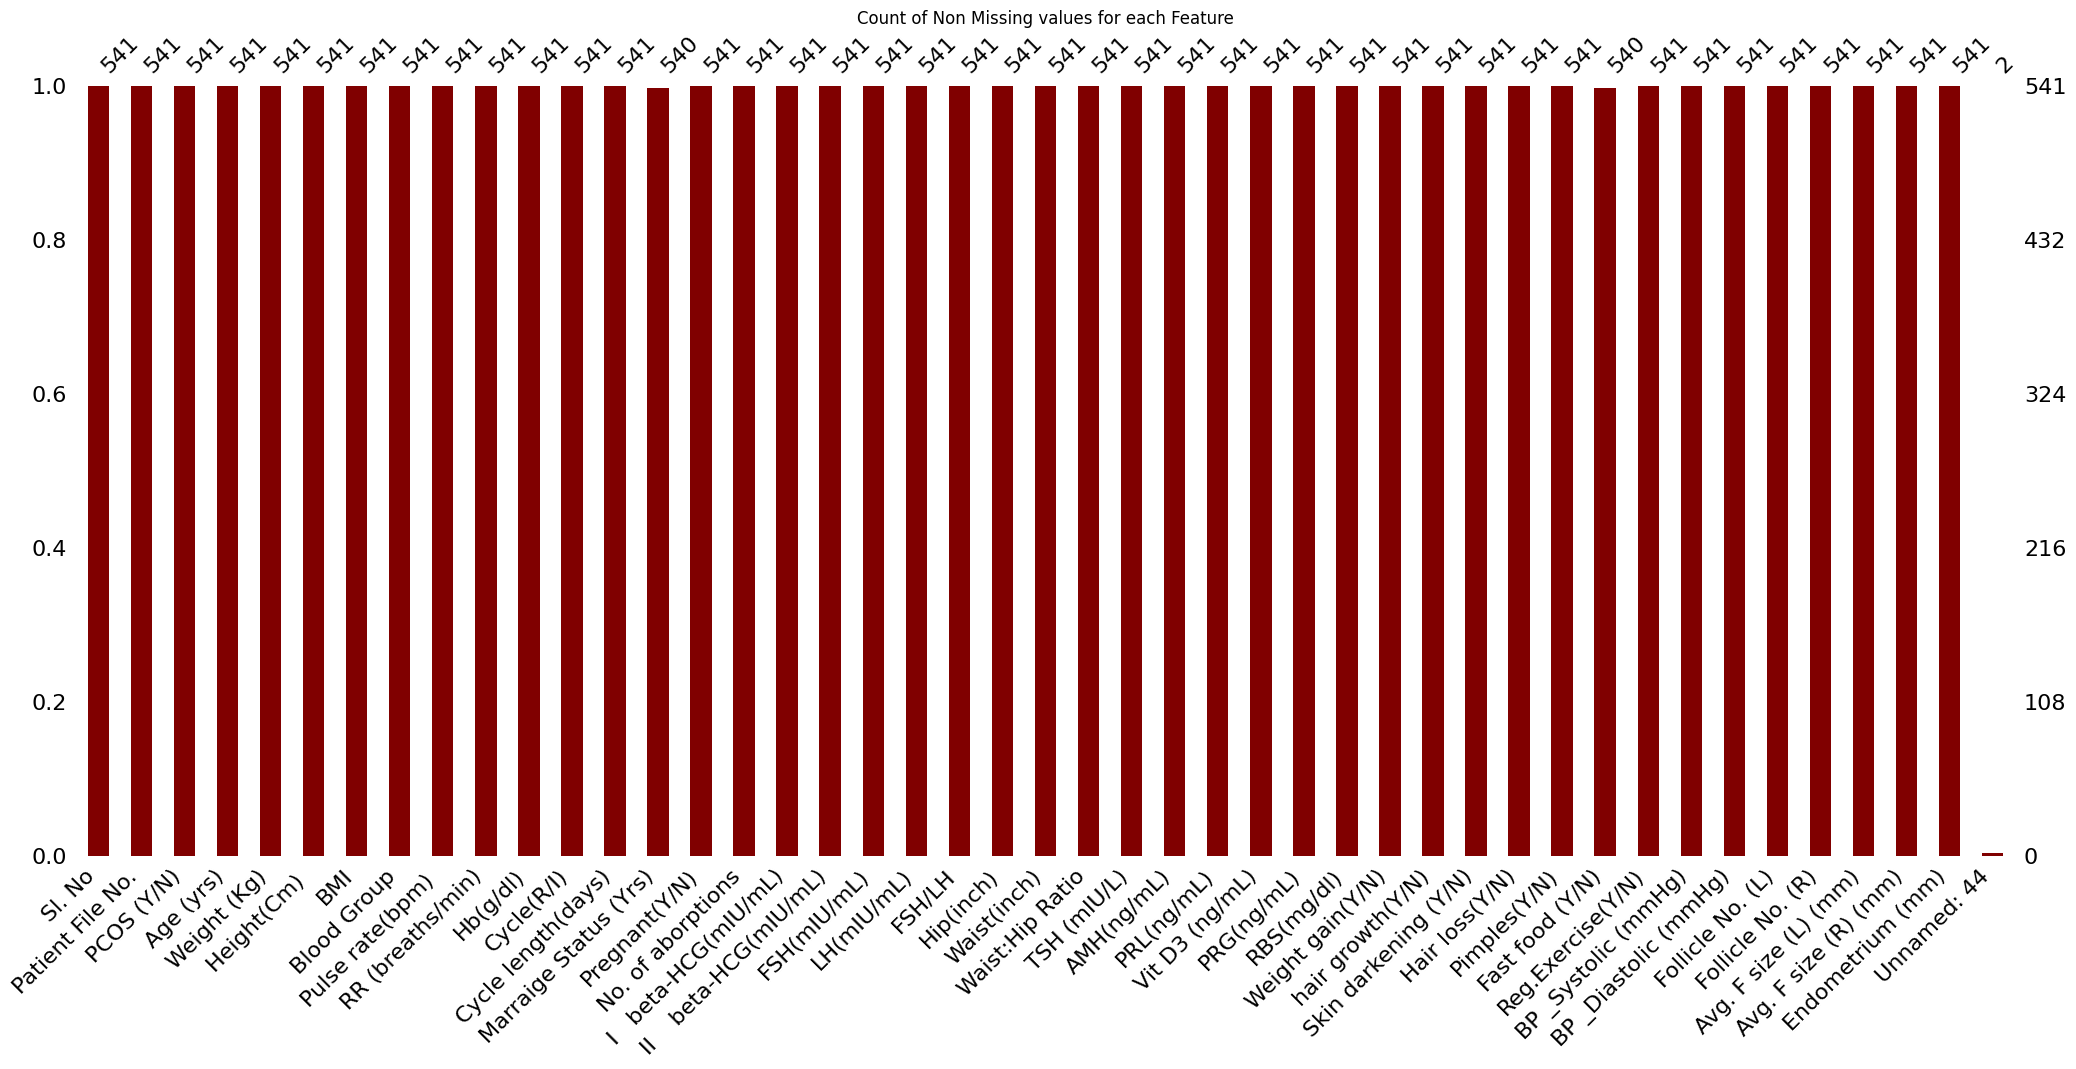

In [13]:
import matplotlib.pyplot as plt
import missingno as msno

# Generate the missing values bar plot
msno.bar(df, color='maroon') 
plt.title("Count of Non Missing values for each Feature")
plt.show()


In [14]:
#Dropping redundant and unnecessary columns
df.drop('Unnamed: 44',axis=1,inplace=True)
df.drop('Patient File No.',axis=1,inplace=True)
df.drop('Sl. No',axis=1,inplace=True)

In [15]:
df.isna().sum()

PCOS (Y/N)                0
 Age (yrs)                0
Weight (Kg)               0
Height(Cm)                0
BMI                       0
Blood Group               0
Pulse rate(bpm)           0
RR (breaths/min)          0
Hb(g/dl)                  0
Cycle(R/I)                0
Cycle length(days)        0
Marraige Status (Yrs)     1
Pregnant(Y/N)             0
No. of aborptions         0
  I   beta-HCG(mIU/mL)    0
II    beta-HCG(mIU/mL)    0
FSH(mIU/mL)               0
LH(mIU/mL)                0
FSH/LH                    0
Hip(inch)                 0
Waist(inch)               0
Waist:Hip Ratio           0
TSH (mIU/L)               0
AMH(ng/mL)                0
PRL(ng/mL)                0
Vit D3 (ng/mL)            0
PRG(ng/mL)                0
RBS(mg/dl)                0
Weight gain(Y/N)          0
hair growth(Y/N)          0
Skin darkening (Y/N)      0
Hair loss(Y/N)            0
Pimples(Y/N)              0
Fast food (Y/N)           1
Reg.Exercise(Y/N)         0
BP _Systolic (mmHg) 

Converting the below columns to numeric values:

In [16]:
df["AMH(ng/mL)"] = pd.to_numeric(df["AMH(ng/mL)"], errors='coerce')
df["II    beta-HCG(mIU/mL)"] = pd.to_numeric(df["II    beta-HCG(mIU/mL)"], errors='coerce')

Imputing the null values:

In [17]:
df['AMH(ng/mL)'].fillna(df['AMH(ng/mL)'].median(),inplace=True)
df['Marraige Status (Yrs)'].fillna(df['Marraige Status (Yrs)'].median(),inplace=True)
df['II    beta-HCG(mIU/mL)'].fillna(df['II    beta-HCG(mIU/mL)'].median(),inplace=True)
df['Fast food (Y/N)'].fillna(df['Fast food (Y/N)'].median(),inplace=True)

In [18]:
df.isna().sum()

PCOS (Y/N)                0
 Age (yrs)                0
Weight (Kg)               0
Height(Cm)                0
BMI                       0
Blood Group               0
Pulse rate(bpm)           0
RR (breaths/min)          0
Hb(g/dl)                  0
Cycle(R/I)                0
Cycle length(days)        0
Marraige Status (Yrs)     0
Pregnant(Y/N)             0
No. of aborptions         0
  I   beta-HCG(mIU/mL)    0
II    beta-HCG(mIU/mL)    0
FSH(mIU/mL)               0
LH(mIU/mL)                0
FSH/LH                    0
Hip(inch)                 0
Waist(inch)               0
Waist:Hip Ratio           0
TSH (mIU/L)               0
AMH(ng/mL)                0
PRL(ng/mL)                0
Vit D3 (ng/mL)            0
PRG(ng/mL)                0
RBS(mg/dl)                0
Weight gain(Y/N)          0
hair growth(Y/N)          0
Skin darkening (Y/N)      0
Hair loss(Y/N)            0
Pimples(Y/N)              0
Fast food (Y/N)           0
Reg.Exercise(Y/N)         0
BP _Systolic (mmHg) 

## Feature selection

In [19]:
cor_matrix=df.corr().abs()
print(cor_matrix)

                        PCOS (Y/N)   Age (yrs)  Weight (Kg)  Height(Cm)   \
PCOS (Y/N)                1.000000    0.168513     0.211938     0.068254   
 Age (yrs)                0.168513    1.000000     0.029734     0.119819   
Weight (Kg)               0.211938    0.029734     1.000000     0.420098   
Height(Cm)                0.068254    0.119819     0.420098     1.000000   
BMI                       0.199534    0.021261     0.901675     0.006878   
Blood Group               0.036433    0.010954     0.072682     0.040825   
Pulse rate(bpm)           0.091821    0.045831     0.019983     0.074339   
RR (breaths/min)          0.036928    0.087382     0.043614     0.029459   
Hb(g/dl)                  0.087170    0.021558     0.009594     0.024378   
Cycle(R/I)                0.401644    0.085943     0.200758     0.017336   
Cycle length(days)        0.178480    0.055918     0.002308     0.009536   
Marraige Status (Yrs)     0.113056    0.661407     0.043650     0.066934   
Pregnant(Y/N

In [20]:
upper_tri=cor_matrix.where(np.triu(np.ones(cor_matrix.shape),k=1).astype(np.bool))
print(upper_tri)

                        PCOS (Y/N)   Age (yrs)  Weight (Kg)  Height(Cm)   \
PCOS (Y/N)                     NaN    0.168513     0.211938     0.068254   
 Age (yrs)                     NaN         NaN     0.029734     0.119819   
Weight (Kg)                    NaN         NaN          NaN     0.420098   
Height(Cm)                     NaN         NaN          NaN          NaN   
BMI                            NaN         NaN          NaN          NaN   
Blood Group                    NaN         NaN          NaN          NaN   
Pulse rate(bpm)                NaN         NaN          NaN          NaN   
RR (breaths/min)               NaN         NaN          NaN          NaN   
Hb(g/dl)                       NaN         NaN          NaN          NaN   
Cycle(R/I)                     NaN         NaN          NaN          NaN   
Cycle length(days)             NaN         NaN          NaN          NaN   
Marraige Status (Yrs)          NaN         NaN          NaN          NaN   
Pregnant(Y/N

We try to find columns that have a high correlation and drop one of them.

In [21]:
to_drop=[column for column in upper_tri.columns if any(upper_tri[column]>0.95)]
to_drop

['FSH/LH']

In [22]:
df.drop('FSH/LH',axis=1,inplace=True)

We drop the following columns as we already have a column with their ratio.

In [23]:
df.drop('Waist(inch)',axis=1,inplace=True)
df.drop('Hip(inch)',axis=1,inplace=True)

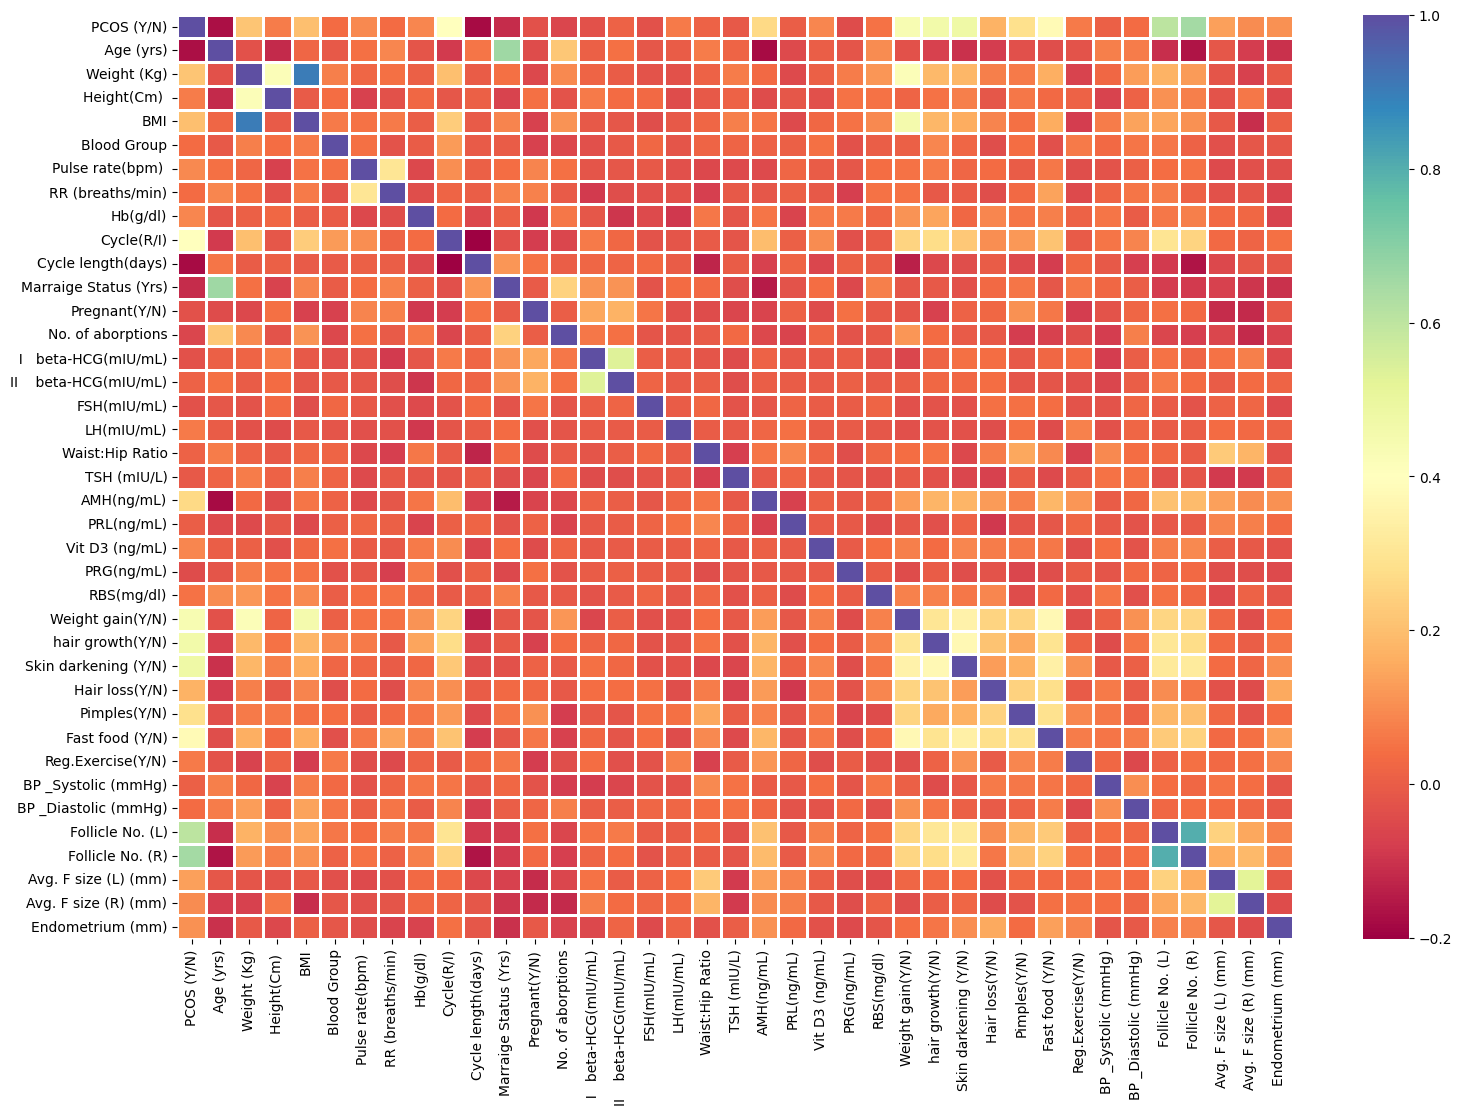

In [25]:
plt.figure(figsize = (18, 12))

corrmat = df.corr()
mask = np.triu(np.ones_like(corrmat, dtype = bool))

sns.heatmap(data = corrmat, cmap='Spectral', annot = False, fmt = '.2g', linewidth = 1)
plt.show()

In [26]:
corrmat["PCOS (Y/N)"].sort_values(ascending=False)

PCOS (Y/N)                1.000000
Follicle No. (R)          0.648327
Follicle No. (L)          0.603346
Skin darkening (Y/N)      0.475733
hair growth(Y/N)          0.464667
Weight gain(Y/N)          0.441047
Cycle(R/I)                0.401644
Fast food (Y/N)           0.376183
Pimples(Y/N)              0.286077
AMH(ng/mL)                0.264141
Weight (Kg)               0.211938
BMI                       0.199534
Hair loss(Y/N)            0.172879
Avg. F size (L) (mm)      0.132992
Endometrium (mm)          0.106648
Avg. F size (R) (mm)      0.097690
Pulse rate(bpm)           0.091821
Hb(g/dl)                  0.087170
Vit D3 (ng/mL)            0.085494
Height(Cm)                0.068254
Reg.Exercise(Y/N)         0.065337
LH(mIU/mL)                0.063879
RBS(mg/dl)                0.048922
BP _Diastolic (mmHg)      0.038032
RR (breaths/min)          0.036928
Blood Group               0.036433
II    beta-HCG(mIU/mL)    0.012760
Waist:Hip Ratio           0.012386
BP _Systolic (mmHg) 

We reduced the number of columns from 45 to 39.

## Data Visualization

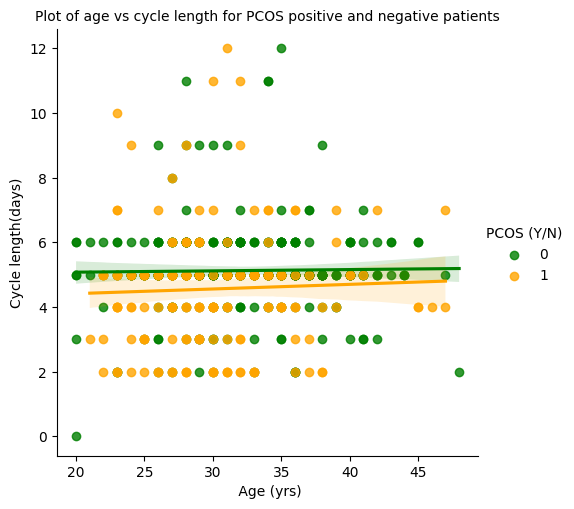

In [27]:
color = ["green", "orange"]
fig=sns.lmplot(data=df,x=" Age (yrs)",y="Cycle length(days)", hue="PCOS (Y/N)",palette=color)
plt.title('Plot of age vs cycle length for PCOS positive and negative patients', fontdict={'fontsize': 10})
plt.savefig(r'lmplot1.png',bbox_inches="tight", pad_inches=0.3, dpi=300)
plt.show(fig)

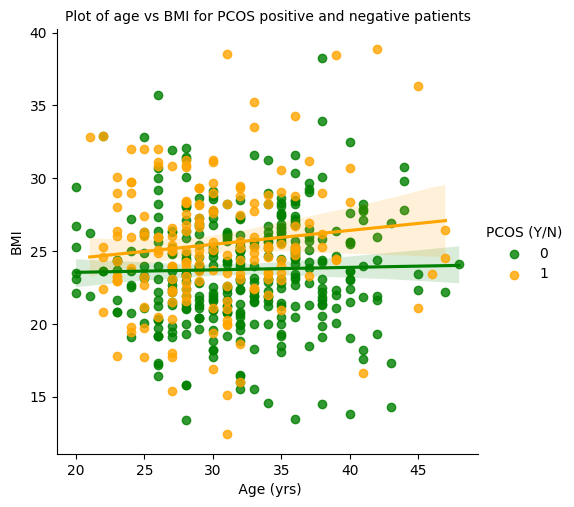

In [28]:
fig= sns.lmplot(data =df,x=" Age (yrs)",y="BMI", hue="PCOS (Y/N)", palette= color)
plt.title('Plot of age vs BMI for PCOS positive and negative patients', fontdict={'fontsize': 10})
plt.savefig(r'lmplot2.png',bbox_inches="tight", pad_inches=0.3, dpi=300)
plt.show(fig)

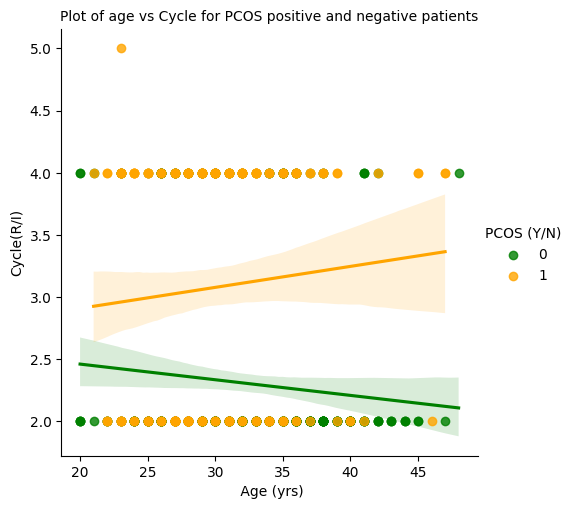

In [29]:
# cycle IR wrt age 
sns.lmplot(data =df,x=" Age (yrs)",y="Cycle(R/I)", hue="PCOS (Y/N)",palette=color)
plt.title('Plot of age vs Cycle for PCOS positive and negative patients', fontdict={'fontsize': 10})
plt.savefig(r'lmplot3.png',bbox_inches="tight", pad_inches=0.3, dpi=300)
plt.show()

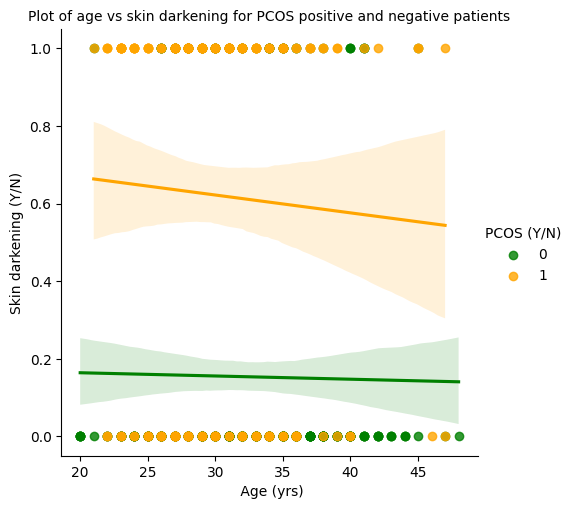

In [30]:
sns.lmplot(data =df,x=" Age (yrs)",y="Skin darkening (Y/N)", hue="PCOS (Y/N)",palette=color)
plt.title('Plot of age vs skin darkening for PCOS positive and negative patients', fontdict={'fontsize': 10})
plt.savefig(r'lmplot4.png',bbox_inches="tight", pad_inches=0.3, dpi=300)
plt.show()

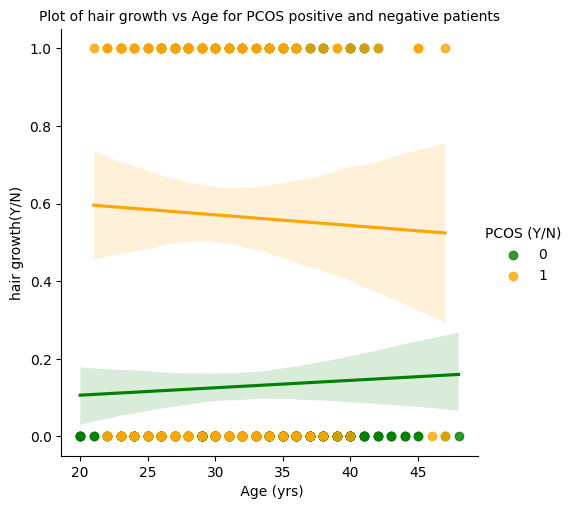

In [31]:
sns.lmplot(data =df,x=" Age (yrs)",y="hair growth(Y/N)", hue="PCOS (Y/N)",palette=color)
plt.title('Plot of hair growth vs Age for PCOS positive and negative patients', fontdict={'fontsize': 10})
plt.savefig(r'lmplot5.png',bbox_inches="tight", pad_inches=0.3, dpi=300)
plt.show()

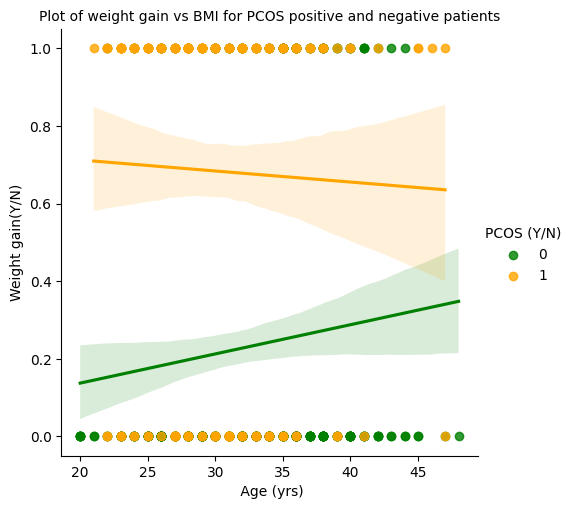

In [32]:
sns.lmplot(data =df,x=" Age (yrs)",y="Weight gain(Y/N)", hue="PCOS (Y/N)",palette=color)
plt.title('Plot of weight gain vs BMI for PCOS positive and negative patients', fontdict={'fontsize': 10})
plt.savefig(r'lmplot6.png',bbox_inches="tight", pad_inches=0.3, dpi=300)
plt.show()

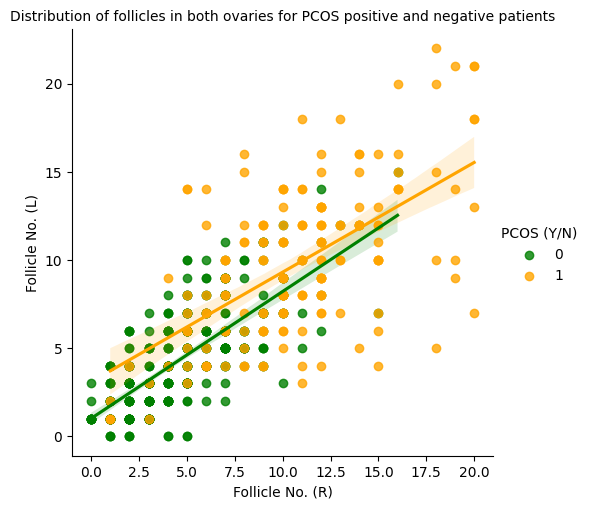

In [33]:
# Distribution of follicles in both ovaries. 
sns.lmplot(data =df,x='Follicle No. (R)',y='Follicle No. (L)', hue="PCOS (Y/N)",palette=color)
plt.title('Distribution of follicles in both ovaries for PCOS positive and negative patients', fontdict={'fontsize': 10})
plt.savefig(r'lmplot7.png',bbox_inches="tight", pad_inches=0.3, dpi=300)
plt.show()

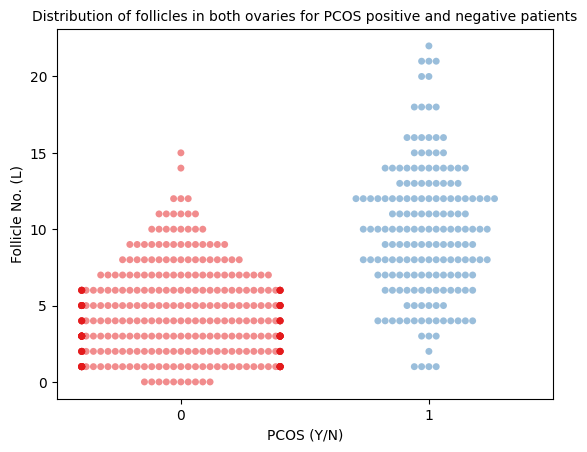

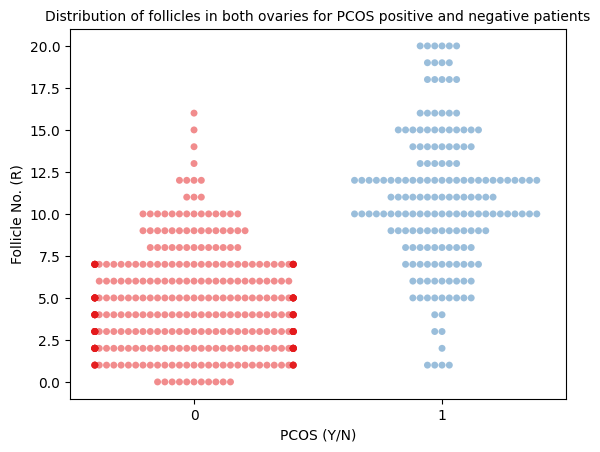

In [34]:
features = ["Follicle No. (L)","Follicle No. (R)"]
for i in features:
    sns.swarmplot(x=df["PCOS (Y/N)"], y=df[i], color="black", alpha=0.5, palette='Set1' )
    #sns.boxenplot(x=df["PCOS (Y/N)_x"], y=df[i], palette=color)
    plt.title('Distribution of follicles in both ovaries for PCOS positive and negative patients', fontdict={'fontsize': 10})
    plt.savefig(r'plot'+str(i)+'.png',bbox_inches="tight", pad_inches=0.3, dpi=300)
    plt.show()

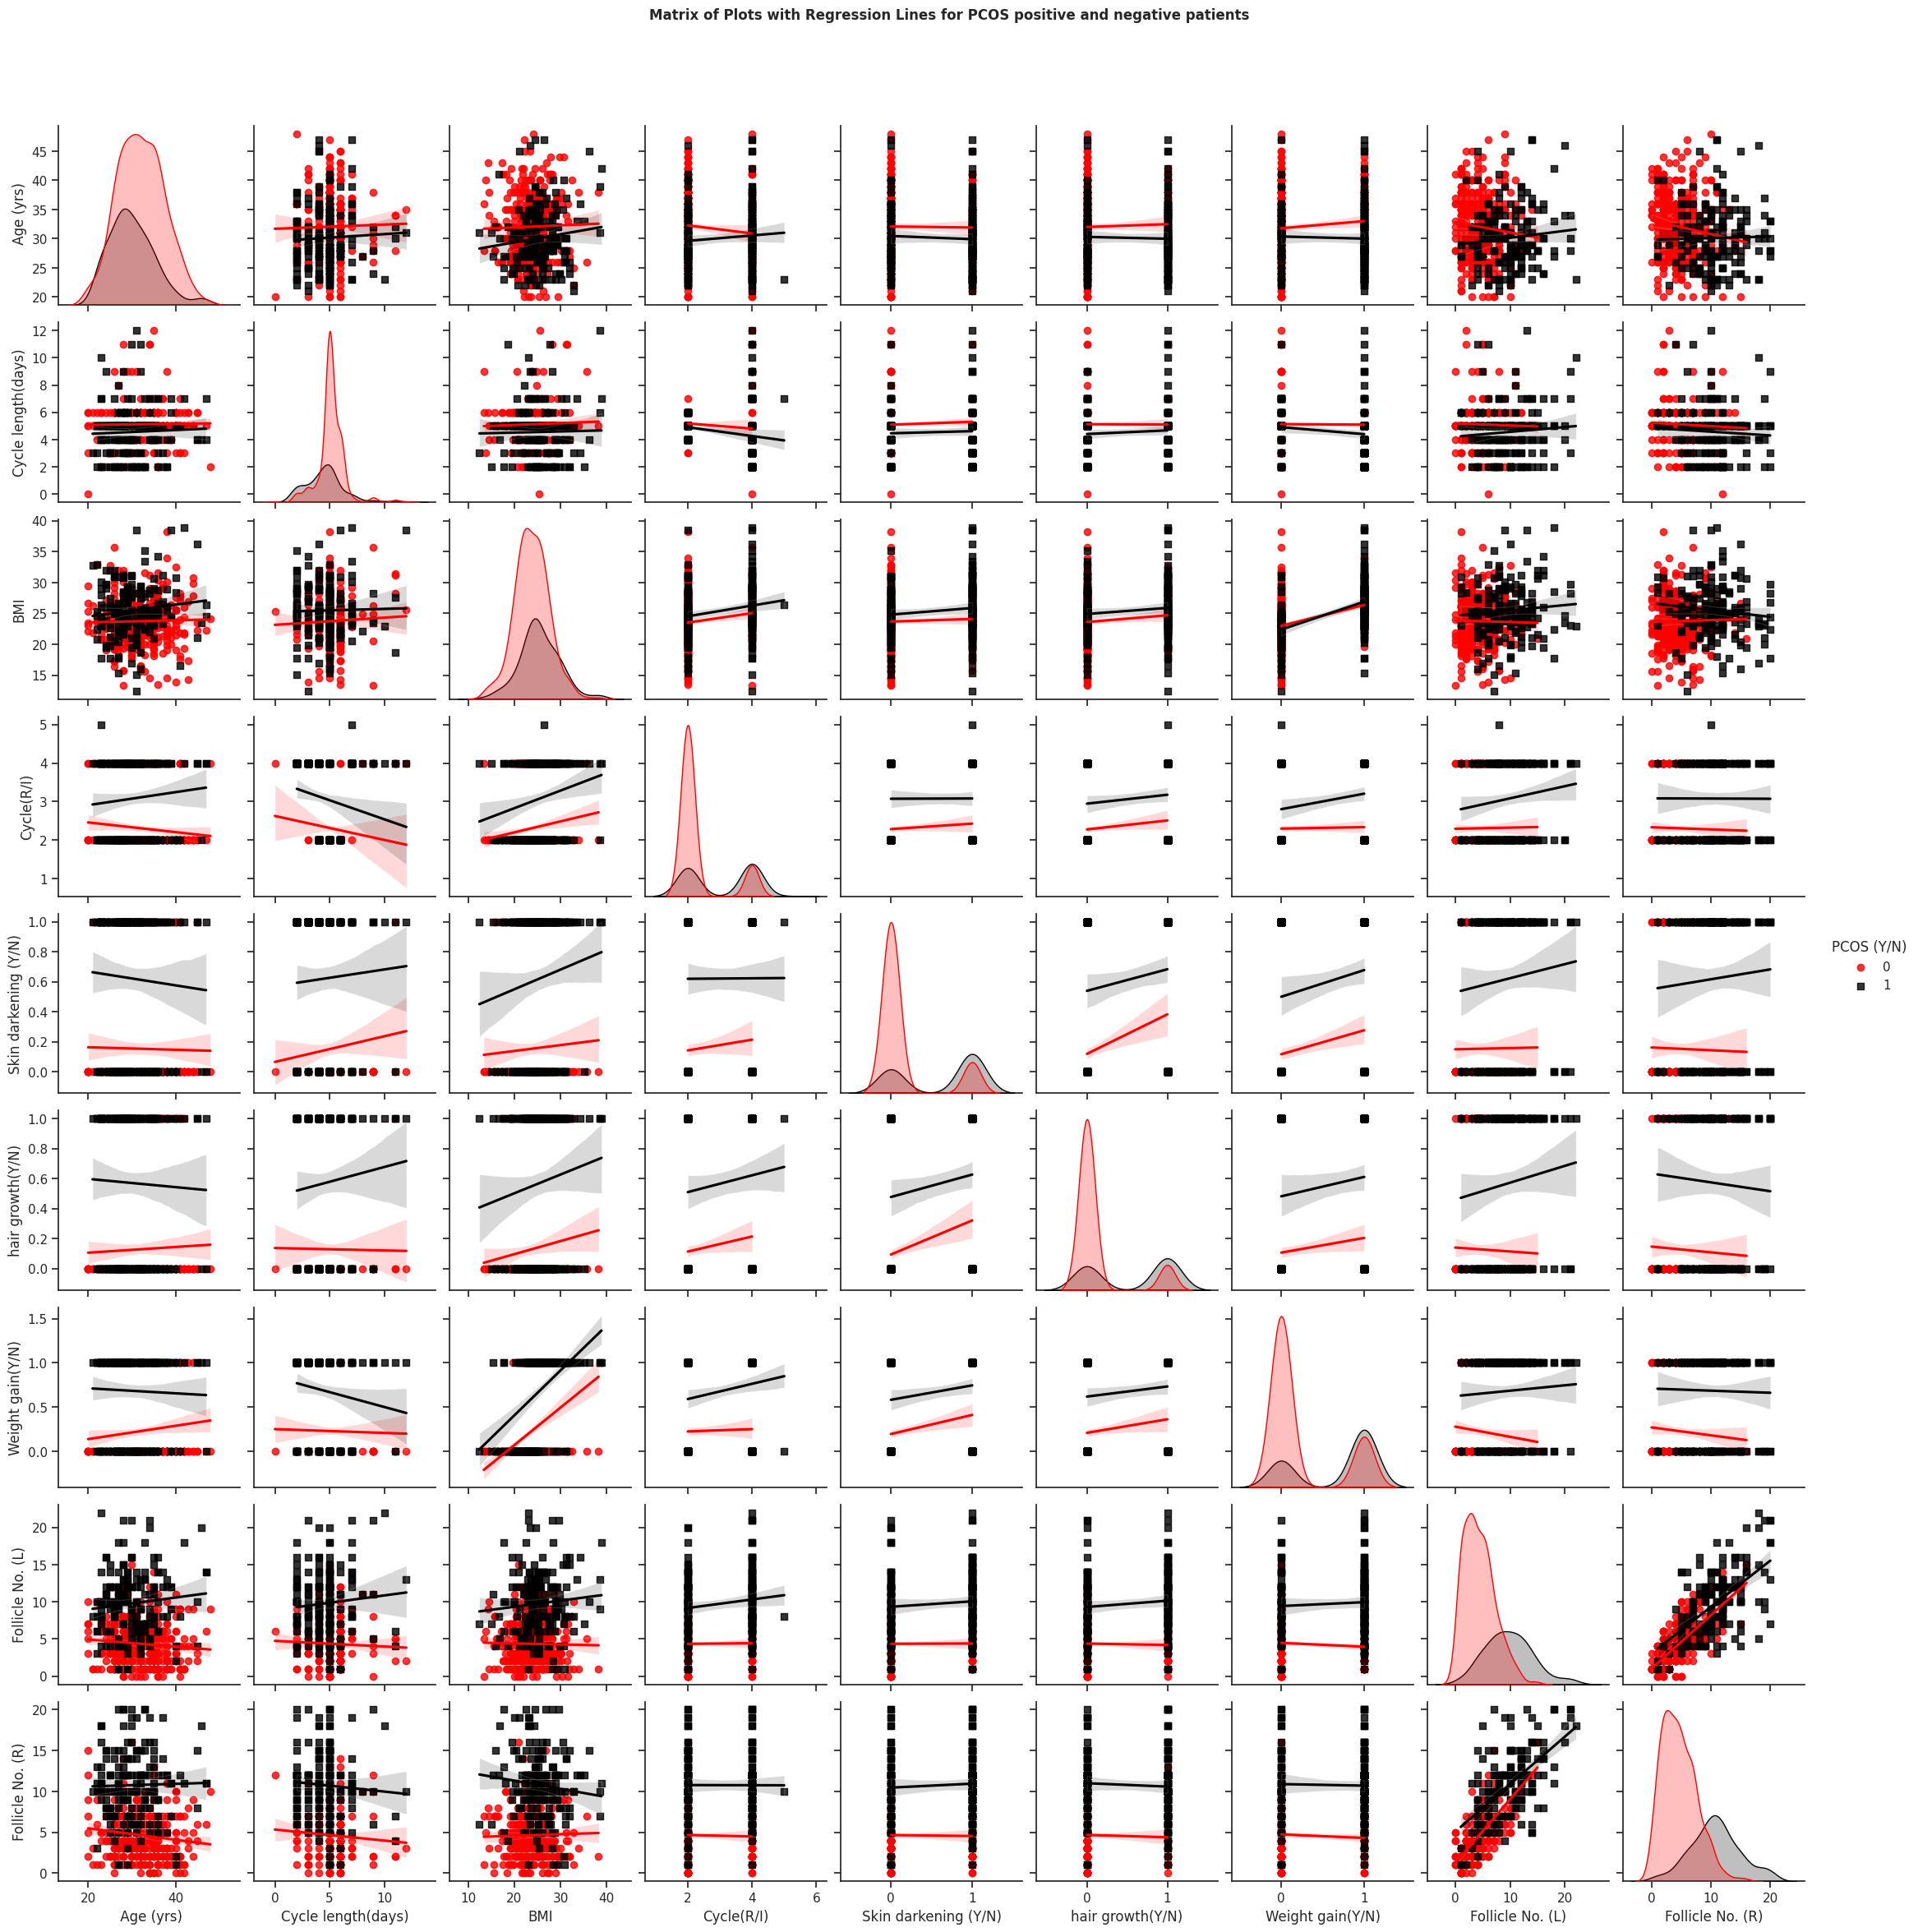

In [35]:
import seaborn as sns
import matplotlib.pyplot as plt

# Define the color palette
color = ["red", "black"]

# Define the features to be plotted
features = [" Age (yrs)", "Cycle length(days)", "BMI", "Cycle(R/I)", "Skin darkening (Y/N)", "hair growth(Y/N)", "Weight gain(Y/N)", "Follicle No. (L)", "Follicle No. (R)"]

# Create a pairplot with regression lines
sns.set(style="ticks", color_codes=True)
g = sns.pairplot(df, hue="PCOS (Y/N)", vars=features, palette=color, diag_kind="kde", markers=["o", "s"], diag_kws=dict(shade=True), kind='reg')
g.fig.suptitle("Matrix of Plots with Regression Lines for PCOS positive and negative patients", y=1.05, fontweight='bold', fontsize=12)
plt.savefig(r'pairplot_with_regression.png', bbox_inches="tight", pad_inches=0.3, dpi=300)
plt.show()


#Data Mining models

Since we do not have domain knowledge, we cannot select the most important features based on that. Hence we use other techniques with our models to avoid overfitting, since out dataset has less records and more number of predictors.

##Imports for models

In [54]:
from sklearn import preprocessing
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import cross_val_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.model_selection import train_test_split
from sklearn.feature_selection import RFE
from imblearn.over_sampling import RandomOverSampler
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
from sklearn.feature_selection import RFECV
from sklearn.metrics import precision_recall_curve
from sklearn.feature_selection import RFE
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier

In [55]:
plt.rc("font", size=14)
sns.set(style="white")
sns.set(style="whitegrid", color_codes=True)

## Oversampling

In [56]:
# Checking for the target variable distribution
fig = px.pie(data_frame = df, names = 'PCOS (Y/N)', hole = 0.5, title = 'Dataset response variable split', 
             width = 640, height = 480, color_discrete_sequence = px.colors.sequential.Bluered)
fig.update_layout(title_x = 0.5, uniformtext_minsize = 30)
fig.show()

In [57]:
from imblearn.over_sampling import SMOTE

X = df.drop('PCOS (Y/N)', axis=1)
y = df['PCOS (Y/N)']

smote = SMOTE(sampling_strategy='minority') # SMOTE
X_res, y_res = smote.fit_resample(X, y)

print("Number of PCOS (Y/N) = 1 after oversampling: ", sum(y_res == 1))
print("Number of PCOS (Y/N) = 0 after oversampling: ", sum(y_res == 0))


Number of PCOS (Y/N) = 1 after oversampling:  364
Number of PCOS (Y/N) = 0 after oversampling:  364


In [58]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541 entries, 0 to 540
Data columns (total 39 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   PCOS (Y/N)              541 non-null    int64  
 1    Age (yrs)              541 non-null    int64  
 2   Weight (Kg)             541 non-null    float64
 3   Height(Cm)              541 non-null    float64
 4   BMI                     541 non-null    float64
 5   Blood Group             541 non-null    int64  
 6   Pulse rate(bpm)         541 non-null    int64  
 7   RR (breaths/min)        541 non-null    int64  
 8   Hb(g/dl)                541 non-null    float64
 9   Cycle(R/I)              541 non-null    int64  
 10  Cycle length(days)      541 non-null    int64  
 11  Marraige Status (Yrs)   541 non-null    float64
 12  Pregnant(Y/N)           541 non-null    int64  
 13  No. of aborptions       541 non-null    int64  
 14    I   beta-HCG(mIU/mL)  541 non-null    fl

# Splitting Dataset and Standardizing


In [59]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler


# split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_res, y_res, test_size=0.3, random_state=42)

# separate binary categorical variables
binary_cols = [11, 24, 25, 26, 27, 28, 29, 30]
binary_data_train = X_train.iloc[:, binary_cols]
binary_data_test = X_test.iloc[:, binary_cols]

# separate numerical variables
numerical_cols = [col for col in X_train.columns if col not in binary_cols]
numerical_data_train = X_train[numerical_cols]
numerical_data_test = X_test[numerical_cols]

# Standardize numerical data
scaler = StandardScaler()
numerical_data_train_scaled = pd.DataFrame(scaler.fit_transform(numerical_data_train), columns=numerical_cols)
numerical_data_test_scaled = pd.DataFrame(scaler.transform(numerical_data_test), columns=numerical_cols)

# Combine binary and numerical data for train and test sets
X_train = pd.concat([binary_data_train.reset_index(drop=True), numerical_data_train_scaled], axis=1)
X_test = pd.concat([binary_data_test.reset_index(drop=True), numerical_data_test_scaled], axis=1)

print(X_train.head())
print(X_test.head())



   Pregnant(Y/N)  Weight gain(Y/N)  hair growth(Y/N)  Skin darkening (Y/N)  \
0              0                 0                 0                     1   
1              0                 1                 1                     1   
2              1                 0                 0                     0   
3              1                 0                 0                     0   
4              1                 0                 0                     0   

   Hair loss(Y/N)  Pimples(Y/N)  Fast food (Y/N)  Reg.Exercise(Y/N)  \
0               0             1              1.0                  0   
1               0             0              1.0                  0   
2               1             1              1.0                  0   
3               0             0              0.0                  1   
4               0             0              0.0                  0   

    Age (yrs)  Weight (Kg)  Height(Cm)        BMI  Blood Group  \
0   -1.321539    -0.786346     0.71045

In [60]:
X_train = X_train.loc[:,~X_train.columns.duplicated()]


X_test = X_test.loc[:,~X_test.columns.duplicated()]

In [61]:
X_train

,Pregnant(Y/N),Weight gain(Y/N),hair growth(Y/N),Skin darkening (Y/N),Hair loss(Y/N),Pimples(Y/N),Fast food (Y/N),Reg.Exercise(Y/N),Age (yrs),Weight (Kg),Height(Cm),BMI,Blood Group,Pulse rate(bpm),RR (breaths/min),Hb(g/dl),Cycle(R/I),Cycle length(days),Marraige Status (Yrs),No. of aborptions,I beta-HCG(mIU/mL),II beta-HCG(mIU/mL),FSH(mIU/mL),LH(mIU/mL),Waist:Hip Ratio,TSH (mIU/L),AMH(ng/mL),PRL(ng/mL),Vit D3 (ng/mL),PRG(ng/mL),RBS(mg/dl),BP _Systolic (mmHg),BP _Diastolic (mmHg),Follicle No. (L),Follicle No. (R),Avg. F size (L) (mm),Avg. F size (R) (mm),Endometrium (mm)
0,0,0,0,1,0,1,1.0,0,-1.321539,-0.786346,0.710457,-1.114995,0.682838,-0.351718,-0.771951,0.237969,1.564948,-1.186839,-0.767031,-0.363964,-0.198863,-0.141978,-0.052884,-0.055710,-1.274609,-0.160875,-0.672821,-0.918061,-0.069423,0.237269,-0.327729,-0.647767,0.163629,-0.449748,-0.102916,-0.150536,-0.098647,-0.488686
1,0,1,1,1,0,0,1.0,0,0.799819,2.164533,1.789416,1.352414,-1.020909,-0.076296,-0.771951,0.970799,-0.688400,0.172218,1.407352,-0.363964,-0.198827,-0.141028,-0.029488,-0.044069,0.664481,-0.403093,0.559337,-1.189177,-0.027716,0.071360,10.558169,-0.647767,0.534619,1.132140,1.444301,-0.349996,0.233244,1.008569
2,1,0,0,0,1,1,1.0,0,-0.357285,-0.677675,0.788993,-1.042992,0.682838,-0.351718,-0.771951,-1.162347,-0.688400,0.851747,-0.543725,-0.363964,0.078240,0.409059,22.537097,-0.034583,0.639491,-0.583894,-0.430919,0.454358,-0.076538,-0.133100,0.381244,-0.647767,0.534619,-0.223764,-0.766009,0.206006,0.404975,-1.320353
3,1,0,0,0,0,0,0.0,1,-0.164435,-1.505611,0.883853,-1.909059,-1.020909,-0.351718,-0.771951,0.329551,-0.688400,-0.507310,-0.767031,-0.363964,-0.015903,-0.142021,-0.029746,-0.070656,-0.765256,0.105167,-0.849565,0.167869,-0.071788,-0.184438,-0.788227,-2.031373,-1.320330,-0.449748,2.328425,-1.303105,1.709783,0.557621
4,1,0,0,0,0,0,0.0,0,-0.357285,-0.033724,0.440244,-0.218190,-0.452994,-0.351718,-0.771951,0.080901,1.564948,2.890333,-0.320418,-0.363964,1.406985,-0.096895,-0.034847,0.007652,-1.570389,0.488265,-0.336226,-0.954675,-0.089040,-0.081762,-0.447132,0.735839,0.534619,0.906156,1.002239,0.809651,1.383581,-0.805839
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
504,0,0,0,0,0,0,0.0,0,-0.357285,0.058269,-0.954753,0.529096,-0.452994,0.199127,0.501706,-1.410997,-0.688400,0.172218,0.349502,-0.363964,-0.195293,-0.141978,-0.037621,-0.064719,-1.288592,-0.370491,-0.583758,1.215346,-0.051936,0.654078,-0.398404,0.735839,-1.320330,-0.449748,-0.323947,-1.001283,-3.183249,-1.320353
505,0,1,1,1,1,1,0.0,0,-0.550136,-0.033724,0.614618,-0.291370,0.682838,-0.351718,0.501706,-0.416398,1.564948,1.531276,-0.990338,-0.363964,-0.199311,-0.141978,-0.053683,-0.073345,-1.095784,-0.339637,-0.364468,-1.201221,-0.071788,-0.175881,-0.398404,0.735839,0.534619,-0.223764,-0.766009,1.111473,0.078772,-2.143574
506,0,1,1,1,1,1,1.0,0,-0.164435,-0.484490,1.946840,-1.239384,-1.588825,-0.351718,-0.771951,1.075500,-0.688400,0.172218,0.237848,-0.363964,-0.160687,-0.141978,-0.031491,-0.050827,1.081816,-0.401344,-0.331242,0.001898,-0.092790,-0.175881,-0.836955,-0.647767,0.534619,0.002220,-0.323947,1.111473,0.731177,-0.291326
507,0,0,0,0,1,1,0.0,1,-0.164435,0.334247,2.358364,-0.622331,0.682838,-0.351718,-0.771951,-0.043424,-0.688400,0.172218,-0.320418,-0.363964,0.232180,-0.141978,-0.049880,-0.058221,0.176751,-0.409058,-0.597049,0.257397,-0.068537,-0.175881,-0.300948,-0.647767,0.534619,-0.675732,-0.987040,-1.303105,0.078772,0.223188


##1. Logistic Regression

Logistic Regression is a simple and elegant model. Since we have a small dataset, we start with logistic regression for classification as it works well with small datasets.

In [97]:
logreg = LogisticRegression(random_state=42)

Even though logistic regression is a simplistic model perfect for our small dataset, it is sensitive to outliers, which are present in our data. Hence we do some hyperparameter tuning to find the best logistic regression model for our data.

### Hyperparameter Tuning

In [98]:
#Hyper parameter tuning
pipe = Pipeline([('classifier' , LogisticRegression())])

# Create param grid.
param_grid = [
    {'classifier' : [LogisticRegression()],
     'classifier__penalty' : ['l1', 'l2'],
    'classifier__C' : np.logspace(-4, 4, 20), 
   }
]

#classifier__C specifies inverse of regularization strength. Smaller values specify stronger regularization.

# Create grid search object
classifier = GridSearchCV(pipe, param_grid = param_grid, cv = 5, verbose=True, n_jobs=-1)

# Fit data
best_classifier = classifier.fit(X_train, y_train)

Fitting 5 folds for each of 40 candidates, totalling 200 fits


In [99]:
#Finding the best parameters
print("{} : {}".format("Best Parameters",best_classifier.best_params_))

Best Parameters : {'classifier': LogisticRegression(C=0.004832930238571752), 'classifier__C': 0.004832930238571752, 'classifier__penalty': 'l2'}


In [100]:
#Best Model
logreg = LogisticRegression(C=0.004832930238571752, penalty= 'l2', random_state=42)
logreg.fit(X_train, y_train)
y_pred = logreg.predict(X_test)
print('Accuracy of logistic regression classifier on test set: {:.2f}'.format(logreg.score(X_test, y_test)*100))
print('Accuracy of logistic regression classifier on train set: {:.2f}'.format(logreg.score(X_train, y_train)*100))

Accuracy of logistic regression classifier on test set: 84.02
Accuracy of logistic regression classifier on train set: 88.80


### Model evaluation

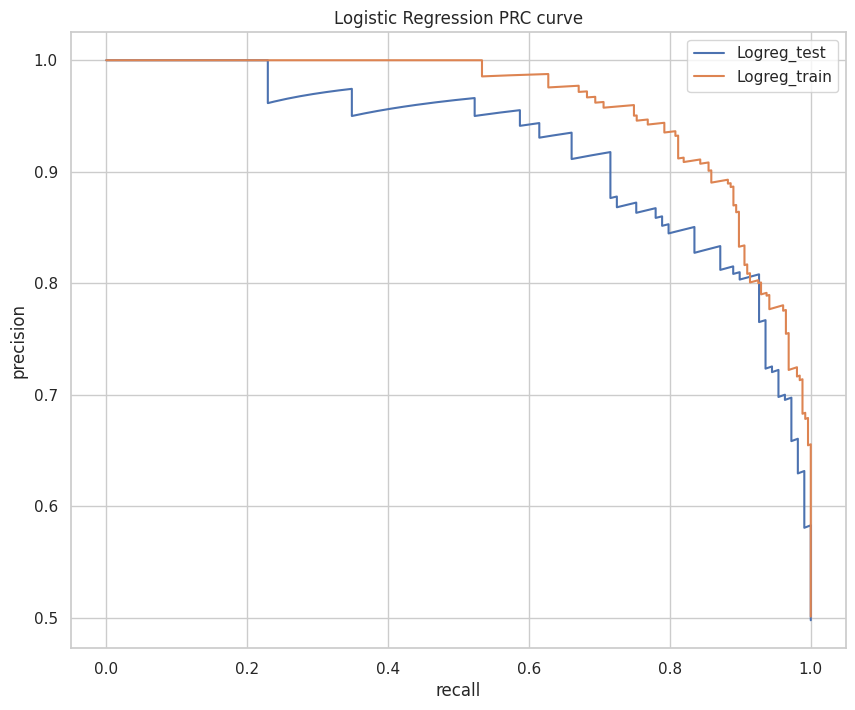

In [101]:
#Plotting the precision recall curve
precision, recall, thresholds = precision_recall_curve(y_test, logreg.predict_proba(X_test)[:,1])
precision1, recall1, thresholds1 = precision_recall_curve(y_train, logreg.predict_proba(X_train)[:,1])
plt.figure(figsize = (10,8))
plt.plot(recall, precision, label = 'Logreg_test')
plt.plot(recall1, precision1, label = 'Logreg_train')
plt.xlabel('recall')
plt.ylabel('precision')
plt.title('Logistic Regression PRC curve')
plt.legend()
plt.show()

In [102]:
# Classification Report
report_logisitc = classification_report(y_test, y_pred)
print(report_logisitc)

              precision    recall  f1-score   support

           0       0.85      0.83      0.84       110
           1       0.83      0.85      0.84       109

    accuracy                           0.84       219
   macro avg       0.84      0.84      0.84       219
weighted avg       0.84      0.84      0.84       219



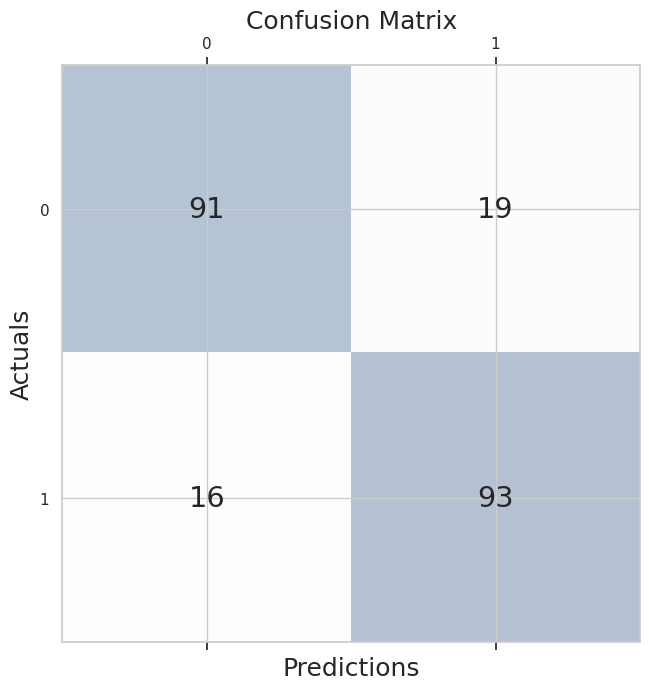

In [103]:
# Confusion matrix
confusion_matrix = confusion_matrix(y_test, y_pred)
fig, ax = plt.subplots(figsize=(7.5, 7.5))
ax.matshow(confusion_matrix, cmap=plt.cm.Blues, alpha=0.3)
for i in range(confusion_matrix.shape[0]):
    for j in range(confusion_matrix.shape[1]):
        ax.text(x=j, y=i,s=confusion_matrix[i, j], va='center', 
                ha='center', size='xx-large')
 
plt.xlabel('Predictions', fontsize=18)
plt.ylabel('Actuals', fontsize=18)
plt.title('Confusion Matrix', fontsize=18)
plt.show()

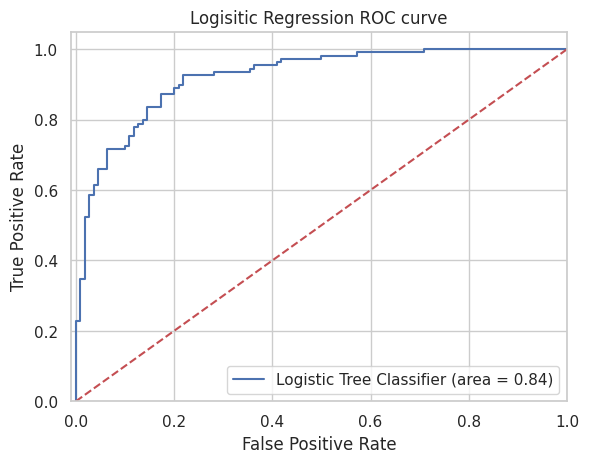

In [104]:
# Plotting the ROC curve
logreg_roc_auc = roc_auc_score(y_test,y_pred)
fpr1, tpr1, thresholds = roc_curve(y_test, logreg.predict_proba(X_test)[:,1])
plt.figure()
plt.plot(fpr1, tpr1, label='Logistic Tree Classifier (area = %0.2f)' % logreg_roc_auc )
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([-0.01, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title("Logisitic Regression ROC curve")
plt.legend(loc="lower right")
plt.show()

In [105]:
# Use cross-validation to evaluate the model performance
scores = cross_val_score(logreg, X_res, y_res, cv=5, scoring='accuracy').mean()
scores

0.8255361360415682

We can see that k-fold cross validation slightly increases the accuracy of the model.

### Feature selection

In [106]:
w0 = logreg.intercept_[0]
w=logreg.coef_[0]

We use odds to calculate feature importance. If we increase any feature Xj by one unit, then the prediction will change e to the power of its weight/coefficient. If the coefficient is positive, the odds increase by that factor, else decrese. We can apply this rule to the all weights to find the feature importance.

<Figure size 3000x3000 with 0 Axes>

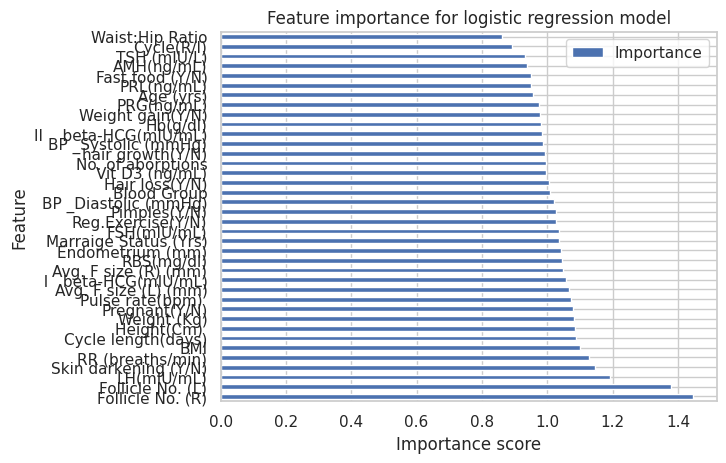

In [107]:
# feature importance
feature_importance = pd.DataFrame(df.columns[1:], columns = ["Feature"])
importance=[]
for i in range(0, len(w)):
  importance.append(pow(math.e, w[i]))
feature_importance["Importance"] = importance
feature_importance.sort_values(by = ["Importance"], ascending=False, inplace=True)
plt.figure(figsize = (30,30))
feature_importance.plot.barh(x='Feature', y='Importance')
plt.title("Feature importance for logistic regression model")
plt.xlabel("Importance score")
plt.show()

In [108]:
feature_importance

,Feature,Importance
34,Follicle No. (R),1.446212
33,Follicle No. (L),1.380187
16,LH(mIU/mL),1.191146
26,Skin darkening (Y/N),1.145957
6,RR (breaths/min),1.128817
3,BMI,1.101675
9,Cycle length(days),1.089286
2,Height(Cm),1.084544
1,Weight (Kg),1.080747
11,Pregnant(Y/N),1.079193


We can see that all features have relatively similar importance here. We now use Recursive Feature Elimination with cross-validation to find the optimal number of features.

In [109]:
rfecv = RFECV(
    estimator=LogisticRegression(C=0.004832930238571752, penalty= 'l2', random_state=42),
    min_features_to_select=5,
    step=5,
    n_jobs=-1,
    cv=5,
)

_ = rfecv.fit(X_train, y_train)

These are the optimal features:

In [110]:
X_train.columns[rfecv.support_]

Index(['Pregnant(Y/N)', 'Weight gain(Y/N)', 'hair growth(Y/N)',
       'Skin darkening (Y/N)', 'Pimples(Y/N)', 'Fast food (Y/N)',
       'Reg.Exercise(Y/N)', ' Age (yrs)', 'Weight (Kg)', 'Height(Cm) ', 'BMI',
       'Pulse rate(bpm) ', 'RR (breaths/min)', 'Hb(g/dl)', 'Cycle(R/I)',
       'Cycle length(days)', 'Marraige Status (Yrs)', 'No. of aborptions',
       '  I   beta-HCG(mIU/mL)', 'FSH(mIU/mL)', 'LH(mIU/mL)',
       'Waist:Hip Ratio', 'AMH(ng/mL)', 'Vit D3 (ng/mL)', 'PRG(ng/mL)',
       'RBS(mg/dl)', 'BP _Systolic (mmHg)', 'BP _Diastolic (mmHg)',
       'Follicle No. (L)', 'Follicle No. (R)', 'Avg. F size (L) (mm)',
       'Avg. F size (R) (mm)', 'Endometrium (mm)'],
      dtype='object')

In [111]:
X_train_new=X_train.loc[:, ['Pregnant(Y/N)', 'Weight gain(Y/N)', 'hair growth(Y/N)',
       'Skin darkening (Y/N)', 'Pimples(Y/N)', 'Fast food (Y/N)',
       'Reg.Exercise(Y/N)', ' Age (yrs)', 'Weight (Kg)', 'Height(Cm) ', 'BMI',
       'Pulse rate(bpm) ', 'RR (breaths/min)', 'Hb(g/dl)', 'Cycle(R/I)',
       'Cycle length(days)', 'Marraige Status (Yrs)', 'No. of aborptions',
       '  I   beta-HCG(mIU/mL)', 'FSH(mIU/mL)', 'LH(mIU/mL)',
       'Waist:Hip Ratio', 'AMH(ng/mL)', 'Vit D3 (ng/mL)', 'PRG(ng/mL)',
       'RBS(mg/dl)', 'BP _Systolic (mmHg)', 'BP _Diastolic (mmHg)',
       'Follicle No. (L)', 'Follicle No. (R)', 'Avg. F size (L) (mm)',
       'Avg. F size (R) (mm)', 'Endometrium (mm)']]

In [112]:
X_test_new=X_test.loc[:, ['Pregnant(Y/N)', 'Weight gain(Y/N)', 'hair growth(Y/N)',
       'Skin darkening (Y/N)', 'Pimples(Y/N)', 'Fast food (Y/N)',
       'Reg.Exercise(Y/N)', ' Age (yrs)', 'Weight (Kg)', 'Height(Cm) ', 'BMI',
       'Pulse rate(bpm) ', 'RR (breaths/min)', 'Hb(g/dl)', 'Cycle(R/I)',
       'Cycle length(days)', 'Marraige Status (Yrs)', 'No. of aborptions',
       '  I   beta-HCG(mIU/mL)', 'FSH(mIU/mL)', 'LH(mIU/mL)',
       'Waist:Hip Ratio', 'AMH(ng/mL)', 'Vit D3 (ng/mL)', 'PRG(ng/mL)',
       'RBS(mg/dl)', 'BP _Systolic (mmHg)', 'BP _Diastolic (mmHg)',
       'Follicle No. (L)', 'Follicle No. (R)', 'Avg. F size (L) (mm)',
       'Avg. F size (R) (mm)', 'Endometrium (mm)']]

In [113]:
logreg = LogisticRegression(C=0.004832930238571752, penalty= 'l2', random_state=42)
logreg.fit(X_train_new, y_train)
y_pred_new = logreg.predict(X_test_new)

print("Training accuracy:", logreg.score(X_train_new, y_train))
print("Testing accuracy:",logreg.score(X_test_new, y_test))

Training accuracy: 0.888015717092338
Testing accuracy: 0.8401826484018264


###Model evaluation post feature selection

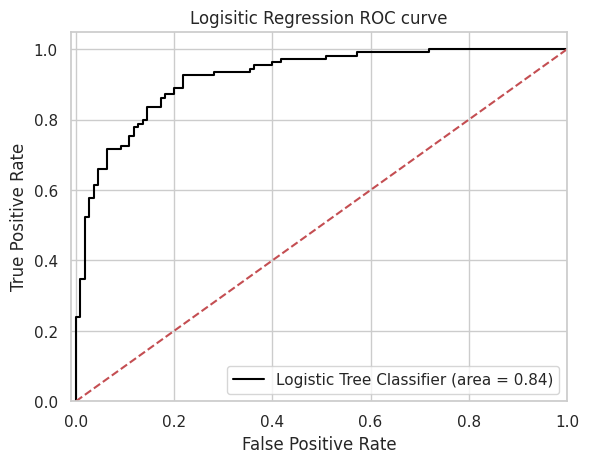

In [117]:
# Plotting the ROC curve
logreg_roc_auc = roc_auc_score(y_test,y_pred)
fpr1, tpr1, thresholds = roc_curve(y_test, logreg.predict_proba(X_test_new)[:,1])
plt.figure()
plt.plot(fpr1, tpr1, color='black', label='Logistic Tree Classifier (area = %0.2f)' % logreg_roc_auc )
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([-0.01, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title("Logisitic Regression ROC curve")
plt.legend(loc="lower right")
plt.show()

We can see now that after feature selection, the difference between the training and testing accuracies have drastically reduced. This shows that the overfitting has been corrected to some extent.

In [118]:
# Classification Report
report_logistic = classification_report(y_test, y_pred_new)
print(report_logistic)

              precision    recall  f1-score   support

           0       0.85      0.83      0.84       110
           1       0.83      0.85      0.84       109

    accuracy                           0.84       219
   macro avg       0.84      0.84      0.84       219
weighted avg       0.84      0.84      0.84       219



##2. Decision Tree

Since we have less data, outliers can have a huge impact on the dataset. So we try out decision trees since they are robust to outliers and feature selection is intrinsic, hence the number of predictors used will also reduce, which is what we want to avoid overfitting.

In [119]:
dt_cv=DecisionTreeClassifier()

### Hyperparameter Tuning

In [120]:
#Hyper parameter tuning
param_grid = {

    'max_depth': range(25, 45),

    'max_features': range(2, 38), 'criterion': ['gini', 'entropy', 'log_loss']}

classifier_dt = GridSearchCV(DecisionTreeClassifier(random_state=42), param_grid,cv=3, verbose=0,n_jobs=-1)

best_model_dt = classifier_dt.fit(X_train,y_train)

In [121]:
#Finding the best parameters
print("{} : {}".format("Best Parameters",best_model_dt.best_params_))

Best Parameters : {'criterion': 'entropy', 'max_depth': 25, 'max_features': 20}


In [122]:
#Best Model
dt_cv=DecisionTreeClassifier(criterion='entropy', max_depth=25, max_features=20, random_state=42)
dt_cv.fit(X_train,y_train)
y_pred = dt_cv.predict(X_test)
print('Accuracy of Decision Tree Classifier on test set: {:.2f}'.format(dt_cv.score(X_test, y_test)*100))
print('Accuracy of Decision Tree classifier on train set: {:.2f}'.format(dt_cv.score(X_train, y_train)*100))

Accuracy of Decision Tree Classifier on test set: 84.93
Accuracy of Decision Tree classifier on train set: 100.00


### Model evaluation

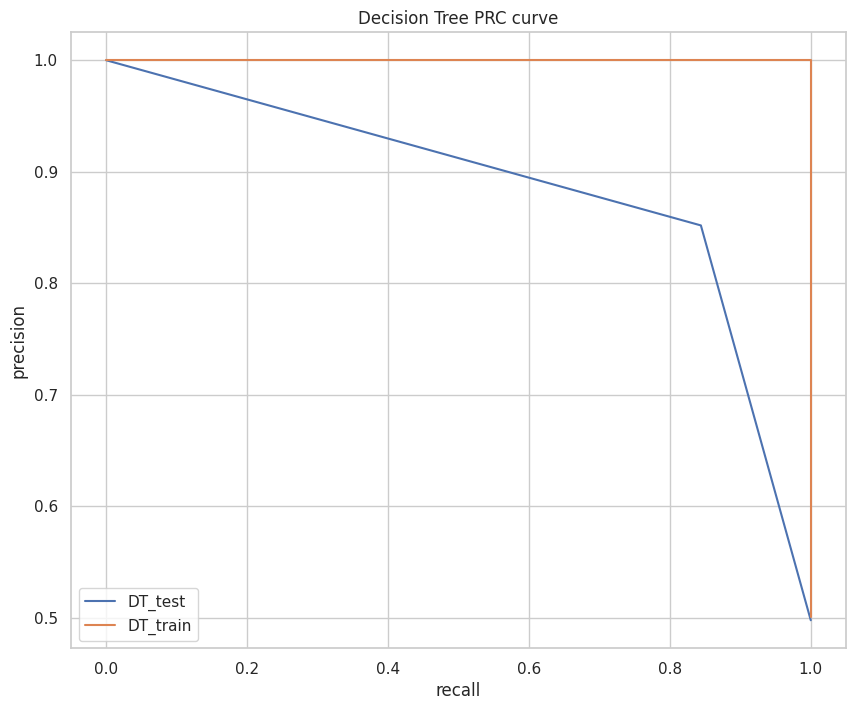

In [123]:
#Plotting the precision recall curve
precision, recall, thresholds = precision_recall_curve(y_test, dt_cv.predict_proba(X_test)[:,1])
precision1, recall1, thresholds1 = precision_recall_curve(y_train, dt_cv.predict_proba(X_train)[:,1])
plt.figure(figsize = (10,8))
plt.plot(recall, precision, label = 'DT_test')
plt.plot(recall1, precision1, label = 'DT_train')
plt.xlabel('recall')
plt.ylabel('precision')
plt.title('Decision Tree PRC curve')
plt.legend()
plt.show()

In [124]:
# Classification Report
report_dt= classification_report(y_test, y_pred)
print(report_dt)

              precision    recall  f1-score   support

           0       0.85      0.85      0.85       110
           1       0.85      0.84      0.85       109

    accuracy                           0.85       219
   macro avg       0.85      0.85      0.85       219
weighted avg       0.85      0.85      0.85       219



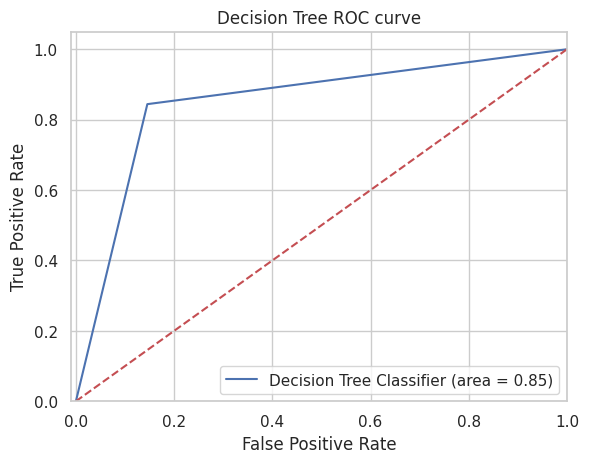

In [125]:
# Plotting the ROC curve
dt_roc_auc = roc_auc_score(y_test,y_pred)
fpr1, tpr1, thresholds = roc_curve(y_test, dt_cv.predict_proba(X_test)[:,1])
plt.figure()
plt.plot(fpr1, tpr1, label='Decision Tree Classifier (area = %0.2f)' % dt_roc_auc )
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([-0.01, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title("Decision Tree ROC curve")
plt.legend(loc="lower right")
plt.show()

In [126]:
# Use cross-validation to evaluate the model performance
scores = cross_val_score(dt_cv, X_res, y_res, cv=5, scoring='accuracy').mean()
scores

0.8132168162494094

### Feature selection

In [127]:
feature_importance=pd.DataFrame(
    zip(X_train.columns, abs(dt_cv.feature_importances_)),
    columns=["Feature", "Weight"],
).sort_values("Weight", ascending=False).reset_index(drop=True)
feature_importance

,Feature,Weight
0,Follicle No. (L),0.236093
1,Fast food (Y/N),0.231490
2,Follicle No. (R),0.147371
3,Marraige Status (Yrs),0.042592
4,I beta-HCG(mIU/mL),0.028691
5,Hb(g/dl),0.028686
6,Avg. F size (L) (mm),0.025725
7,Cycle(R/I),0.024958
8,Age (yrs),0.021275
9,Blood Group,0.020363


<Figure size 3000x3000 with 0 Axes>

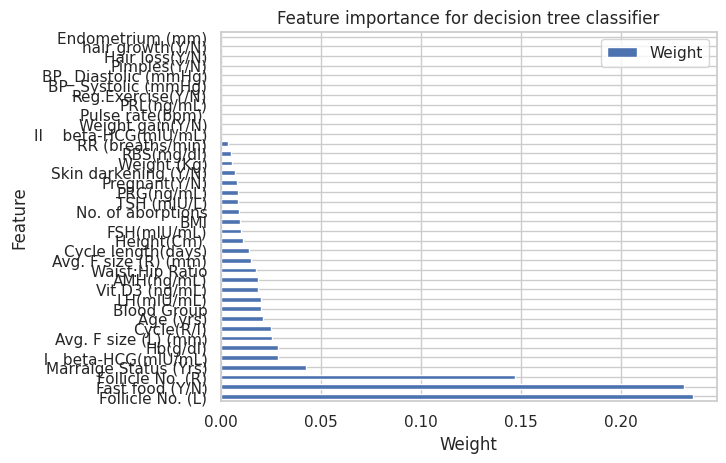

In [128]:
plt.figure(figsize = (30,30))
feature_importance.plot.barh(x='Feature', y='Weight')
plt.title("Feature importance for decision tree classifier")
plt.xlabel("Weight")
plt.show()

Since we know that we should choose 24 features based on the above hyper parameter tuning, instead of using RFECV, we use Recursive Feature Elimination (RFE) and specify the number of features as 24.

In [129]:
rfe = RFE(estimator=DecisionTreeClassifier(criterion='entropy', max_depth=25, max_features=20, random_state=42), n_features_to_select=13)

# Fit to the training data
_ = rfe.fit(X_train, y_train)

In [130]:
X_train.columns[rfe.support_]

Index(['Fast food (Y/N)', 'Pulse rate(bpm) ', 'RR (breaths/min)', 'Hb(g/dl)',
       'Cycle length(days)', 'FSH(mIU/mL)', 'LH(mIU/mL)', 'TSH (mIU/L)',
       'AMH(ng/mL)', 'PRL(ng/mL)', 'RBS(mg/dl)', 'Follicle No. (L)',
       'Follicle No. (R)'],
      dtype='object')

In [131]:
X_train_new=rfe.transform(X_train)
X_test_new=rfe.transform(X_test)

In [132]:
dt_cv = DecisionTreeClassifier(criterion='entropy', max_depth=25, max_features=20, random_state=42)
dt_cv.fit(X_train_new, y_train)
y_pred_new = dt_cv.predict(X_test_new)

print("Training accuracy:", dt_cv.score(X_train_new, y_train)*100)
print("Testing accuracy:",dt_cv.score(X_test_new, y_test)*100)

Training accuracy: 100.0
Testing accuracy: 85.84474885844749


### Model evaluation post feature selection

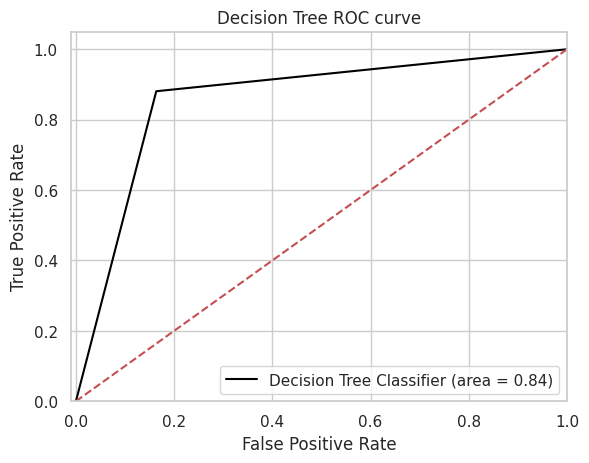

In [137]:
# Plotting the ROC curve
dec_roc_auc = roc_auc_score(y_test,y_pred)
fpr1, tpr1, thresholds = roc_curve(y_test, dt_cv.predict_proba(X_test_new)[:,1])
plt.figure()
plt.plot(fpr1, tpr1, color='black', label='Decision Tree Classifier (area = %0.2f)' % logreg_roc_auc )
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([-0.01, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title("Decision Tree ROC curve")
plt.legend(loc="lower right")
plt.show()

We can see that the testing accuracy has slightly improved and the gap between the PRC curves has reduced, indicating a reduction in overfitting.

In [134]:
# Classification Report
report_dt= classification_report(y_test, y_pred_new)
print(report_dt)

              precision    recall  f1-score   support

           0       0.88      0.84      0.86       110
           1       0.84      0.88      0.86       109

    accuracy                           0.86       219
   macro avg       0.86      0.86      0.86       219
weighted avg       0.86      0.86      0.86       219



##3. Random Forest

Combining results from several models can give us more accurate predictions and it will have improved generalizability. Hence, using random forest is a good idea as it is an ensemble of decision trees. Each decision tree is trained on a bootstrap sample, which is a random subset of the training data with replacement, and the final prediction is made using the predictions of all the tree.

In [138]:
from sklearn.ensemble import RandomForestClassifier
rf_cv=RandomForestClassifier()

In [139]:
#Hyper parameter Tuning
#Grid Search for RF
param_grid = {
    'bootstrap': [True],
    'max_depth': [10,20,30,40],
    'max_features': [2, 3, 4, 5, 6],
    'min_samples_leaf': [2, 3, 4, 5],
    'min_samples_split': [2,3, 5, 8, 10, 12],
    'n_estimators': [50, 100, 200, 300]
}


clf_rf = GridSearchCV(RandomForestClassifier(random_state=42), param_grid,cv=3, verbose=0,n_jobs=-1)
best_model_rf = clf_rf.fit(X_train,y_train)
print(best_model_rf.best_estimator_)
print("The mean accuracy of the model is:",best_model_rf.score(X_test,y_test))

RandomForestClassifier(max_depth=20, max_features=3, min_samples_leaf=2,
                       min_samples_split=8, n_estimators=50, random_state=42)
The mean accuracy of the model is: 0.9041095890410958


In [140]:
#Best Model
rf_model = RandomForestClassifier(max_depth=20, max_features=3, min_samples_leaf=2,
                       min_samples_split=8, n_estimators=50, random_state=42)
rf_model.fit(X_train,y_train)

print("The mean accuracy of the model is:",rf_model.score(X_test,y_test))
y_pred = rf_model.predict(X_test)

print('Accuracy of Gradient on test set: {:.2f}'.format(rf_model.score(X_test, y_test)*100))

print('Accuracy of Random Forest classifier on train set: {:.2f}'.format(rf_model.score(X_train, y_train)*100))

The mean accuracy of the model is: 0.9041095890410958
Accuracy of Gradient on test set: 90.41
Accuracy of Random Forest classifier on train set: 99.41


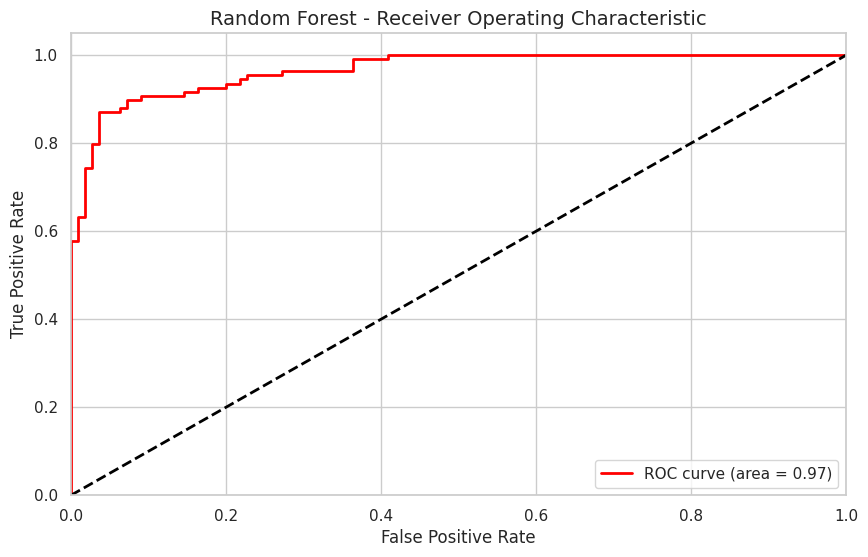

In [141]:
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc

# Get predicted probabilities for positive class
y_pred_proba = rf_model.predict_proba(X_test)[:, 1]

# Compute ROC curve
fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba)
roc_auc = auc(fpr, tpr)

# Plot ROC curve
plt.figure(figsize=(10, 6))
plt.plot(fpr, tpr, color='red', lw=2, label='ROC curve (area = {:.2f})'.format(roc_auc))
plt.plot([0, 1], [0, 1], color='black', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate', fontsize=12)
plt.ylabel('True Positive Rate', fontsize=12)
plt.title('Random Forest - Receiver Operating Characteristic', fontsize=14)
plt.legend(loc='lower right')
plt.show()


In [142]:
# Classification Report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

confusion_matrix = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:\n",confusion_matrix)

report_rf = classification_report(y_test, y_pred)

print(report_rf)

Confusion Matrix:
 [[99 11]
 [10 99]]
              precision    recall  f1-score   support

           0       0.91      0.90      0.90       110
           1       0.90      0.91      0.90       109

    accuracy                           0.90       219
   macro avg       0.90      0.90      0.90       219
weighted avg       0.90      0.90      0.90       219



## 4. Support Vector Machines (SVM)

In [87]:
svc_cv = SVC(probability=True)

### Hyperparameter Tuning

In [88]:
# Hyper parameter tuning
param_grid = {'C': [0.1,1, 10, 100], 'gamma': [1,0.1,0.01,0.001],'kernel': ['rbf', 'sigmoid']} #We do not include linear or poly since they take a lot of time to compute
grid = GridSearchCV(SVC(probability=True),param_grid,refit=True,verbose=2)
best_grid=grid.fit(X_train,y_train)

Fitting 5 folds for each of 32 candidates, totalling 160 fits
[CV] END .........................C=0.1, gamma=1, kernel=rbf; total time=   0.1s
[CV] END .........................C=0.1, gamma=1, kernel=rbf; total time=   0.1s
[CV] END .........................C=0.1, gamma=1, kernel=rbf; total time=   0.1s
[CV] END .........................C=0.1, gamma=1, kernel=rbf; total time=   0.1s
[CV] END .........................C=0.1, gamma=1, kernel=rbf; total time=   0.1s
[CV] END .....................C=0.1, gamma=1, kernel=sigmoid; total time=   0.1s
[CV] END .....................C=0.1, gamma=1, kernel=sigmoid; total time=   0.1s
[CV] END .....................C=0.1, gamma=1, kernel=sigmoid; total time=   0.1s
[CV] END .....................C=0.1, gamma=1, kernel=sigmoid; total time=   0.1s
[CV] END .....................C=0.1, gamma=1, kernel=sigmoid; total time=   0.1s
[CV] END .......................C=0.1, gamma=0.1, kernel=rbf; total time=   0.1s
[CV] END .......................C=0.1, gamma=0.

In [89]:
#Finding the best parameters
print("{} : {}".format("Best Parameters",best_grid.best_params_))

Best Parameters : {'C': 100, 'gamma': 0.01, 'kernel': 'rbf'}


In [91]:
#Best Model
svc_cv=SVC(probability=True, C=100, gamma=0.01, kernel='rbf')
svc_cv.fit(X_train,y_train)
y_pred = svc_cv.predict(X_test)
print('Accuracy of SVM on test set: {:.2f}'.format(svc_cv.score(X_test, y_test)*100))
print('Accuracy of SVM on train set: {:.2f}'.format(svc_cv.score(X_train, y_train)*100))

Accuracy of SVM on test set: 90.41
Accuracy of SVM on train set: 100.00


### Model Evaluation

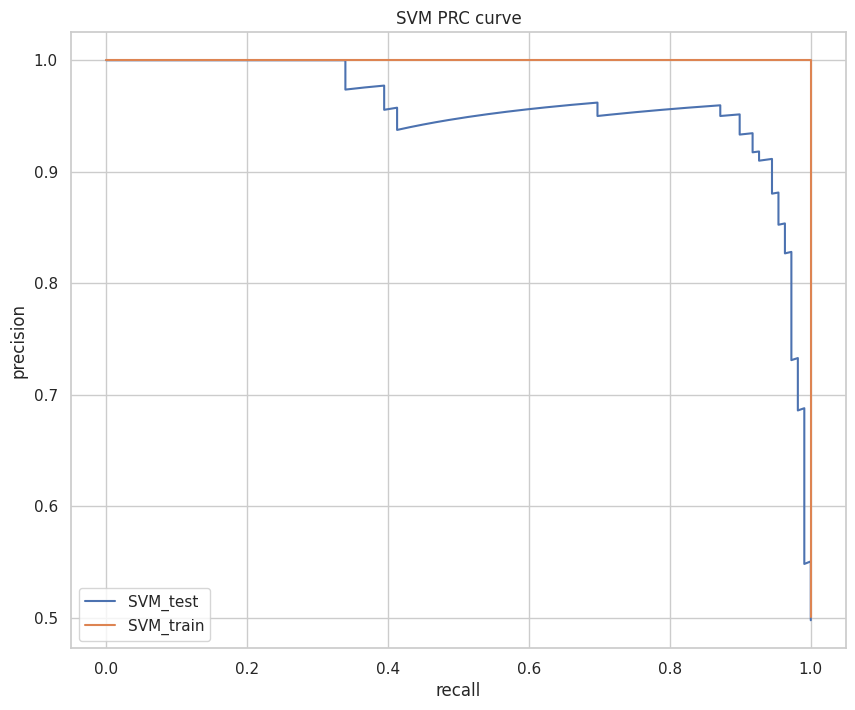

In [92]:
#Plotting the precision recall curve
precision, recall, thresholds = precision_recall_curve(y_test, svc_cv.predict_proba(X_test)[:,1])
precision1, recall1, thresholds1 = precision_recall_curve(y_train, svc_cv.predict_proba(X_train)[:,1])
plt.figure(figsize = (10,8))
plt.plot(recall, precision, label = 'SVM_test')
plt.plot(recall1, precision1, label = 'SVM_train')
plt.xlabel('recall')
plt.ylabel('precision')
plt.title('SVM PRC curve')
plt.legend()
plt.show()

In [93]:
# Classification Report
report_svm= classification_report(y_test, y_pred)
print(report_svm)

              precision    recall  f1-score   support

           0       0.95      0.85      0.90       110
           1       0.87      0.95      0.91       109

    accuracy                           0.90       219
   macro avg       0.91      0.90      0.90       219
weighted avg       0.91      0.90      0.90       219



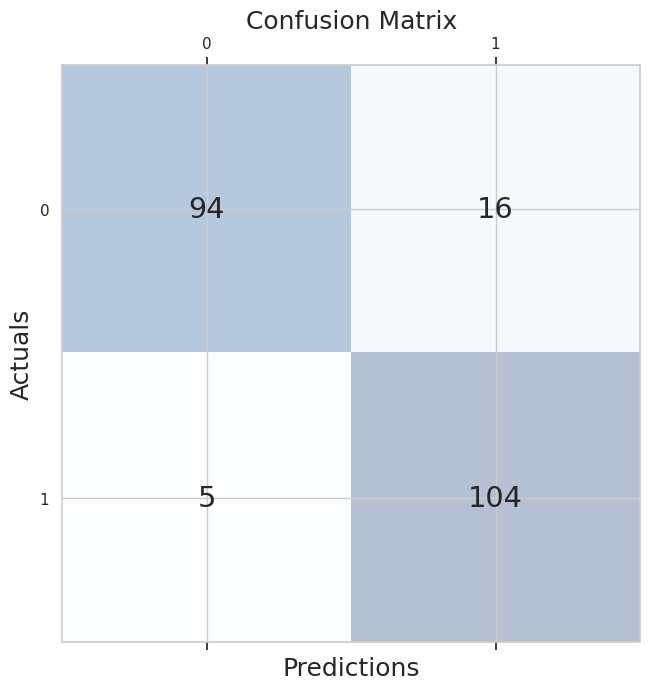

In [94]:
conf_matrix=confusion_matrix(y_test, y_pred) 
fig, ax = plt.subplots(figsize=(7.5, 7.5))
ax.matshow(conf_matrix, cmap=plt.cm.Blues, alpha=0.3)
for i in range(conf_matrix.shape[0]):
    for j in range(conf_matrix.shape[1]):
        ax.text(x=j, y=i,s=conf_matrix[i, j], va='center', 
                ha='center', size='xx-large')
 
plt.xlabel('Predictions', fontsize=18)
plt.ylabel('Actuals', fontsize=18)
plt.title('Confusion Matrix', fontsize=18)
plt.show()

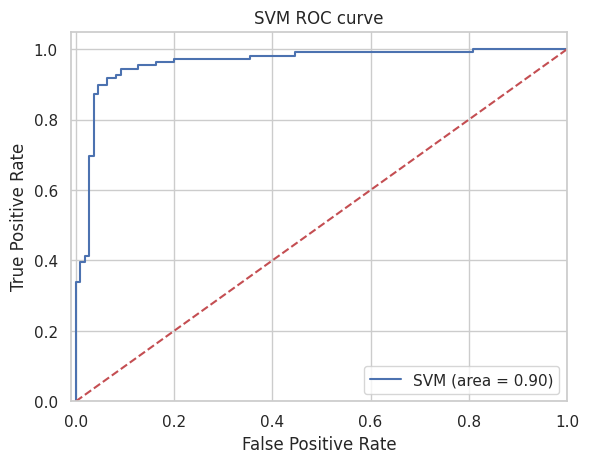

In [95]:
# Plotting the ROC curve
svm_roc_auc = roc_auc_score(y_test,y_pred)
fpr1, tpr1, thresholds = roc_curve(y_test, svc_cv.predict_proba(X_test)[:,1])
plt.figure()
plt.plot(fpr1, tpr1, label='SVM (area = %0.2f)' % svm_roc_auc )
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([-0.01, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title("SVM ROC curve")
plt.legend(loc="lower right")
plt.show()

In [96]:
# Use cross-validation to evaluate the model performance
scores = cross_val_score(svc_cv, X_res, y_res, cv=5, scoring='accuracy').mean()*100
scores

79.55125177137458

We can see that k-fold cross validation increases the accuracy of the model and helps reduce overfitting.

We cannot perform feature selection here as feature importance scores or weight are only assigned to parameters when using linear SVC, which we have not made use of here. Hence, we resort of k-fold cross validation only in our attempt to tackle overfitting.

##5. K-Nearest Neighbors (KNN)

In [79]:
knn_model = KNeighborsClassifier()

### Hyperparameter Tuning

In [80]:
k_range = list(range(1, 31))
param_grid = dict(n_neighbors=k_range)
  
# defining parameter range
classifier_knn= GridSearchCV(knn_model, param_grid, cv=5, scoring='accuracy', return_train_score=False,verbose=1)
knn_best_classifier=classifier_knn.fit(X_train, y_train)

Fitting 5 folds for each of 30 candidates, totalling 150 fits


In [ ]:
print(knn_best_classifier.best_params_)

{'n_neighbors': 4}


In [81]:
#Best model
knn_model=KNeighborsClassifier(n_neighbors=4)
knn_model.fit(X_train,y_train)
y_pred = knn_model.predict(X_test)
print('Accuracy of KNN on test set: {:.2f}'.format(knn_model.score(X_test, y_test)*100))
print('Accuracy of KNN on train set: {:.2f}'.format(knn_model.score(X_train, y_train)*100))

Accuracy of KNN on test set: 82.19
Accuracy of KNN on train set: 90.77


### Model evaluation

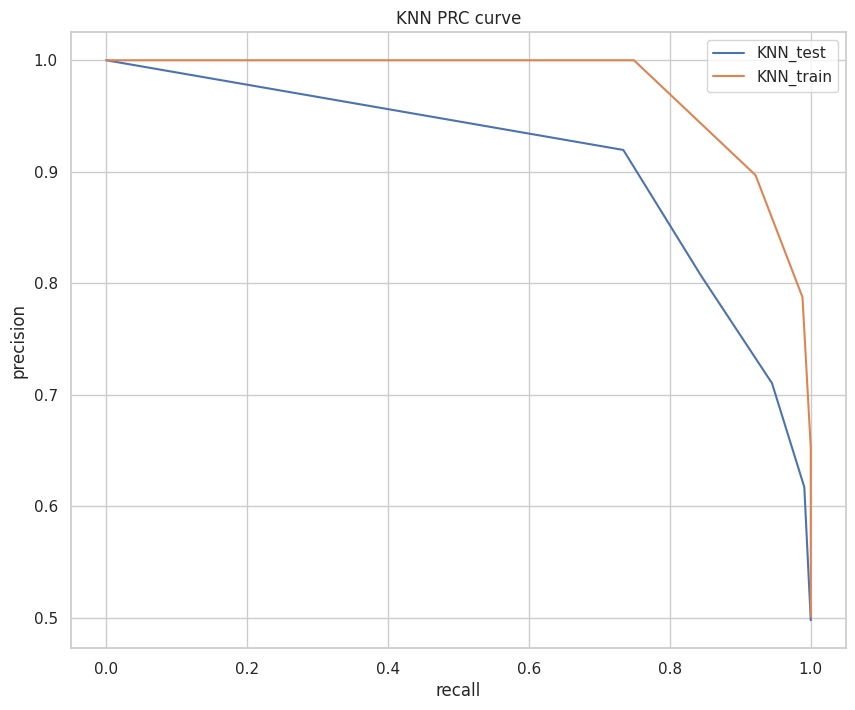

In [82]:
#Plotting the precision recall curve
precision, recall, thresholds = precision_recall_curve(y_test, knn_model.predict_proba(X_test)[:,1])
precision1, recall1, thresholds1 = precision_recall_curve(y_train, knn_model.predict_proba(X_train)[:,1])
plt.figure(figsize = (10,8))
plt.plot(recall, precision, label = 'KNN_test')
plt.plot(recall1, precision1, label = 'KNN_train')
plt.xlabel('recall')
plt.ylabel('precision')
plt.title('KNN PRC curve')
plt.legend()
plt.show()

In [83]:
# Classification Report
report_knn= classification_report(y_test, y_pred)
print(report_knn)

              precision    recall  f1-score   support

           0       0.84      0.80      0.82       110
           1       0.81      0.84      0.83       109

    accuracy                           0.82       219
   macro avg       0.82      0.82      0.82       219
weighted avg       0.82      0.82      0.82       219



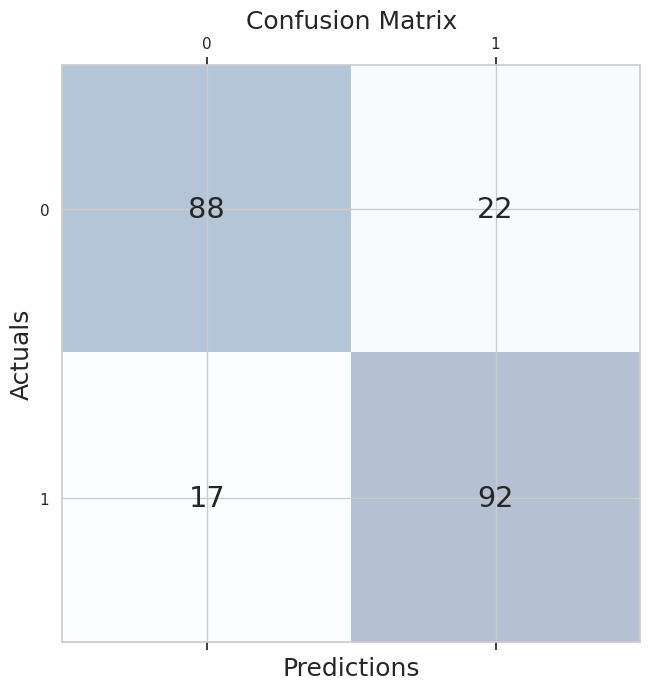

In [84]:
conf_matrix=confusion_matrix(y_test, y_pred) 
fig, ax = plt.subplots(figsize=(7.5, 7.5))
ax.matshow(conf_matrix, cmap=plt.cm.Blues, alpha=0.3)
for i in range(conf_matrix.shape[0]):
    for j in range(conf_matrix.shape[1]):
        ax.text(x=j, y=i,s=conf_matrix[i, j], va='center', 
                ha='center', size='xx-large')
 
plt.xlabel('Predictions', fontsize=18)
plt.ylabel('Actuals', fontsize=18)
plt.title('Confusion Matrix', fontsize=18)
plt.show()

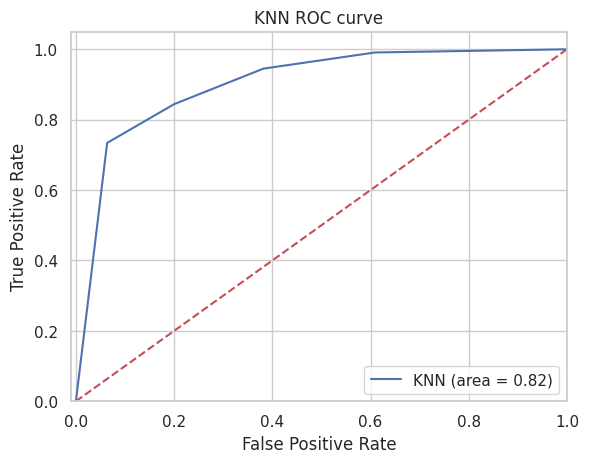

In [85]:
# Plotting the ROC curve
knn_roc_auc = roc_auc_score(y_test,y_pred)
fpr1, tpr1, thresholds = roc_curve(y_test, knn_model.predict_proba(X_test)[:,1])
plt.figure()
plt.plot(fpr1, tpr1, label='KNN (area = %0.2f)' % knn_roc_auc )
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([-0.01, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title("KNN ROC curve")
plt.legend(loc="lower right")
plt.show()

In [86]:
# Use cross-validation to evaluate the model performance
scores = cross_val_score(knn_model, X_res, y_res, cv=5, scoring='accuracy').mean()*100
scores

69.65800661313179

# 6. Gradient Boosting

In [68]:
from sklearn.ensemble import GradientBoostingClassifier
gb_cv=GradientBoostingClassifier()

In [69]:
#Hyper parameter Tuning
param_grid = {
    "learning_rate": [0.01, 0.025, 0.05, 0.075, 0.1, 0.15, 0.2],
    "min_samples_split": np.linspace(1, 8, 8),
    "min_samples_leaf": np.linspace(0.1, 0.5, 2,3, 5),
    "max_depth":[3,5,8,10],
    "n_estimators":[50, 100, 120, 150]
    }
clf1 = GridSearchCV(GradientBoostingClassifier(random_state=42), param_grid,cv=5, verbose=0,n_jobs=-1)
best_model_z = clf1.fit(X_train,y_train)
print(best_model_z.best_estimator_)
print("The mean accuracy of the model is:",best_model_z.score(X_test,y_test))

GradientBoostingClassifier(learning_rate=0.2, min_samples_leaf=0.4,
                           min_samples_split=1.0, n_estimators=150,
                           random_state=42)
The mean accuracy of the model is: 0.8584474885844748


In [70]:
gb_cv.get_params()

{'ccp_alpha': 0.0,
 'criterion': 'friedman_mse',
 'init': None,
 'learning_rate': 0.1,
 'loss': 'log_loss',
 'max_depth': 3,
 'max_features': None,
 'max_leaf_nodes': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 100,
 'n_iter_no_change': None,
 'random_state': None,
 'subsample': 1.0,
 'tol': 0.0001,
 'validation_fraction': 0.1,
 'verbose': 0,
 'warm_start': False}

In [71]:
clf1.get_params()

{'cv': 5,
 'error_score': nan,
 'estimator__ccp_alpha': 0.0,
 'estimator__criterion': 'friedman_mse',
 'estimator__init': None,
 'estimator__learning_rate': 0.1,
 'estimator__loss': 'log_loss',
 'estimator__max_depth': 3,
 'estimator__max_features': None,
 'estimator__max_leaf_nodes': None,
 'estimator__min_impurity_decrease': 0.0,
 'estimator__min_samples_leaf': 1,
 'estimator__min_samples_split': 2,
 'estimator__min_weight_fraction_leaf': 0.0,
 'estimator__n_estimators': 100,
 'estimator__n_iter_no_change': None,
 'estimator__random_state': 42,
 'estimator__subsample': 1.0,
 'estimator__tol': 0.0001,
 'estimator__validation_fraction': 0.1,
 'estimator__verbose': 0,
 'estimator__warm_start': False,
 'estimator': GradientBoostingClassifier(random_state=42),
 'n_jobs': -1,
 'param_grid': {'learning_rate': [0.01, 0.025, 0.05, 0.075, 0.1, 0.15, 0.2],
  'min_samples_split': array([1., 2., 3., 4., 5., 6., 7., 8.]),
  'min_samples_leaf': (array([0.1, 0.5]), 0.4),
  'max_depth': [3, 5, 8, 10]

In [72]:
# Best Parameters
gradientBoostingModel=GradientBoostingClassifier(learning_rate= 0.2,
 max_depth= 3,
 min_samples_leaf=0.4,
 min_samples_split=1.0,
 n_estimators =150)

gradientBoostingModel.fit(X_train,y_train)

print("The mean accuracy of the model is:",gradientBoostingModel.score(X_test,y_test))
y_pred = gradientBoostingModel.predict(X_test)

print('Accuracy of Gradient on test set: {:.2f}'.format(gradientBoostingModel.score(X_test, y_test)*100))
print('Accuracy of Gradient Booster classifier on train set: {:.2f}'.format(gradientBoostingModel.score(X_train, y_train)*100))

report = classification_report(y_test, y_pred)

# Print the classification report
print("Classification Report:\n", report)

The mean accuracy of the model is: 0.8584474885844748
Accuracy of Gradient on test set: 85.84
Accuracy of Gradient Booster classifier on train set: 88.41
Classification Report:
               precision    recall  f1-score   support

           0       0.89      0.82      0.85       110
           1       0.83      0.90      0.86       109

    accuracy                           0.86       219
   macro avg       0.86      0.86      0.86       219
weighted avg       0.86      0.86      0.86       219



In [74]:
import numpy as np
import pandas as pd
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import classification_report

# Define your GradientBoostingClassifier model with the best parameters
gradientBoostingModel = GradientBoostingClassifier(learning_rate=0.2,
                                                   max_depth=3,
                                                   min_samples_leaf=0.4,
                                                   min_samples_split=1.0,
                                                   n_estimators=150)

# Fit the model to your training data
gradientBoostingModel.fit(X_train, y_train)

# Get feature importances
feature_importances = gradientBoostingModel.feature_importances_

# Create a dataframe to store feature importances with their corresponding column names
feature_importances_df = pd.DataFrame({'Feature': X_train.columns, 'Importance': feature_importances})

# Sort the features by importance in descending order
top_features = feature_importances_df.sort_values(by='Importance', ascending=False).head(10)

# Print the top 10 features
print("Top 10 Features:")
print(top_features)

# Make predictions on test data
y_pred = gradientBoostingModel.predict(X_test)

# Print the accuracy on test and train set
print('Accuracy of Gradient on test set: {:.2f}'.format(gradientBoostingModel.score(X_test, y_test) * 100))
print('Accuracy of Gradient Booster classifier on train set: {:.2f}'.format(
    gradientBoostingModel.score(X_train, y_train) * 100))

# Print the classification report
report = classification_report(y_test, y_pred)
print("Classification Report:\n", report)


Top 10 Features:
                Feature  Importance
34     Follicle No. (R)    0.519732
33     Follicle No. (L)    0.212046
6       Fast food (Y/N)    0.090440
15             Hb(g/dl)    0.033729
26           AMH(ng/mL)    0.033507
1      Weight gain(Y/N)    0.019822
31  BP _Systolic (mmHg)    0.018200
37     Endometrium (mm)    0.015534
8             Age (yrs)    0.010984
27           PRL(ng/mL)    0.008348
Accuracy of Gradient on test set: 85.84
Accuracy of Gradient Booster classifier on train set: 88.41
Classification Report:
               precision    recall  f1-score   support

           0       0.89      0.82      0.85       110
           1       0.83      0.90      0.86       109

    accuracy                           0.86       219
   macro avg       0.86      0.86      0.86       219
weighted avg       0.86      0.86      0.86       219



In [75]:
scores = cross_val_score(gradientBoostingModel, X_train, y_train, cv=5)
print("Cross-validation scores:", scores)

# Print the mean and standard deviation of the cross-validation scores
print("Mean CV score:", np.mean(scores))
print("Std CV score:", np.std(scores))

Cross-validation scores: [0.84313725 0.83333333 0.88235294 0.90196078 0.82178218]
Mean CV score: 0.8565132983886624
Std CV score: 0.03051439379688254


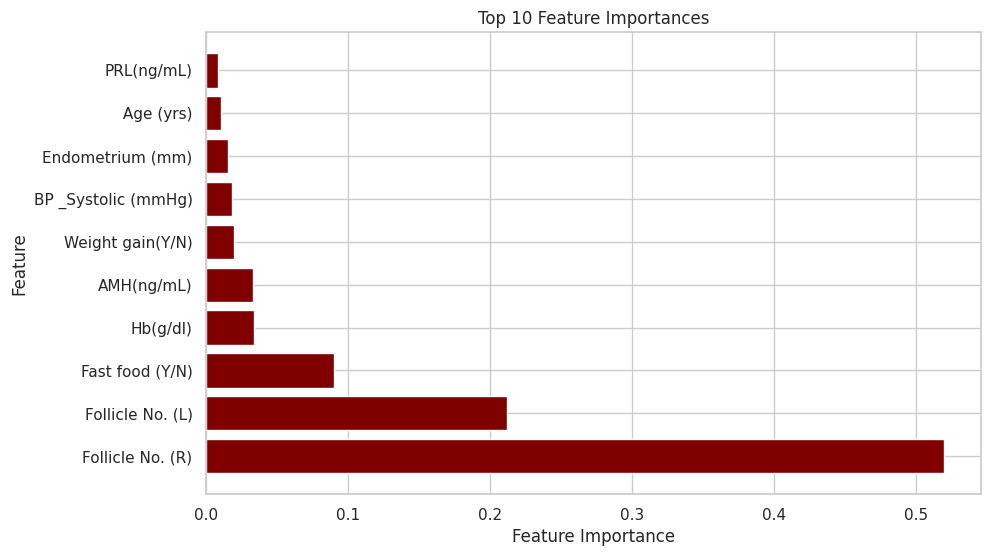

In [76]:
import matplotlib.pyplot as plt

# Sort the features by importance in descending order
top_features = feature_importances_df.sort_values(by='Importance', ascending=False).head(10)

# Create a bar plot for feature importances
plt.figure(figsize=(10, 6))
plt.barh(top_features['Feature'], top_features['Importance'],color='maroon')
plt.xlabel('Feature Importance')
plt.ylabel('Feature')
plt.title('Top 10 Feature Importances')
plt.show()

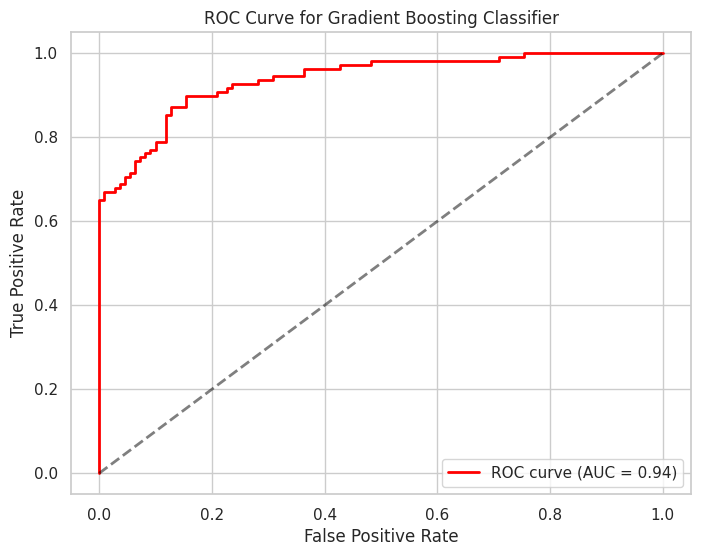

In [77]:
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt

# Get predicted probabilities for positive class
y_probs = gradientBoostingModel.predict_proba(X_test)[:, 1]

# Compute ROC curve and AUC
fpr, tpr, thresholds = roc_curve(y_test, y_probs)
roc_auc = auc(fpr, tpr)

# Plot ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='red', lw=2, label='ROC curve (AUC = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='black', linestyle='--', lw=2, alpha=0.5)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve for Gradient Boosting Classifier')
plt.legend(loc='lower right')
plt.show()


In [78]:
# Classification Report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

cm = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:\n",cm)

report_GB = classification_report(y_test,y_pred)

print(report_GB)

Confusion Matrix:
 [[90 20]
 [11 98]]
              precision    recall  f1-score   support

           0       0.89      0.82      0.85       110
           1       0.83      0.90      0.86       109

    accuracy                           0.86       219
   macro avg       0.86      0.86      0.86       219
weighted avg       0.86      0.86      0.86       219



# 7. Naive Bayes

In [62]:
from sklearn.naive_bayes import GaussianNB
from sklearn.feature_selection import SelectKBest, f_classif
from sklearn.model_selection import GridSearchCV


In [63]:
nb = GaussianNB()
nb.fit(X_train, y_train)
y_pred = nb.predict(X_test)

# Evaluate the model on the test set
print('Accuracy of Naive Bayes on train set: {:.2f}'.format(nb.score(X_train, y_train)*100))
print('Accuracy of Naive Bayes on test set: {:.2f}'.format(nb.score(X_test, y_test)*100))

Accuracy of Naive Bayes on train set: 87.03
Accuracy of Naive Bayes on test set: 83.11


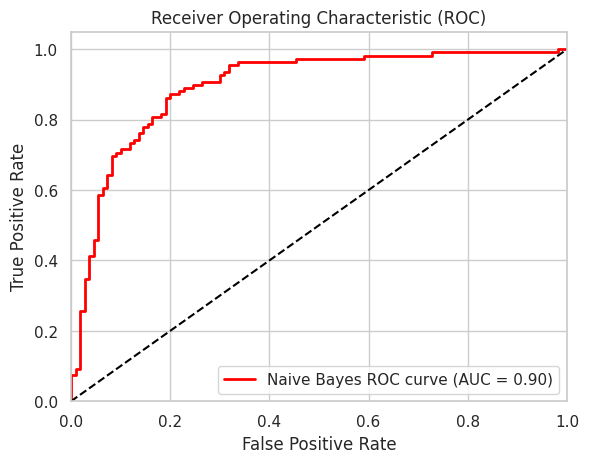

In [64]:
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc

# Get predicted probabilities for positive class
y_probs = nb.predict_proba(X_test)[:, 1]

# Compute ROC curve and AUC
fpr, tpr, thresholds = roc_curve(y_test, y_probs)
roc_auc = auc(fpr, tpr)

# Plot ROC curve
plt.figure()
plt.plot(fpr, tpr, color='red', lw=2, label='Naive Bayes ROC curve (AUC = {:.2f})'.format(roc_auc))
plt.plot([0, 1], [0, 1], color='black', linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC)')
plt.legend(loc="lower right")
plt.show()

In [65]:
from sklearn.metrics import confusion_matrix, classification_report

# Generate a confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Print the confusion matrix
print("Confusion Matrix:\n", cm)

# Calculate the specificity, sensitivity, and ppv
tn, fp, fn, tp = cm.ravel()
specificity = tn / (tn + fp)
sensitivity = tp / (tp + fn)
ppv = tp / (tp + fp)
f1_score = 2 * (ppv * sensitivity) / (ppv + sensitivity)

# Print the specificity, sensitivity, ppv, and f1 score
print("Specificity:", specificity)
print("Sensitivity:", sensitivity)
print("PPV:", ppv)
print("F1 Score:", f1_score)

# Generate a classification report
class_report = classification_report(y_test, y_pred)
print("Classification Report:\n", class_report)

Confusion Matrix:
 [[85 25]
 [12 97]]
Specificity: 0.7727272727272727
Sensitivity: 0.8899082568807339
PPV: 0.7950819672131147
F1 Score: 0.8398268398268398
Classification Report:
               precision    recall  f1-score   support

           0       0.88      0.77      0.82       110
           1       0.80      0.89      0.84       109

    accuracy                           0.83       219
   macro avg       0.84      0.83      0.83       219
weighted avg       0.84      0.83      0.83       219



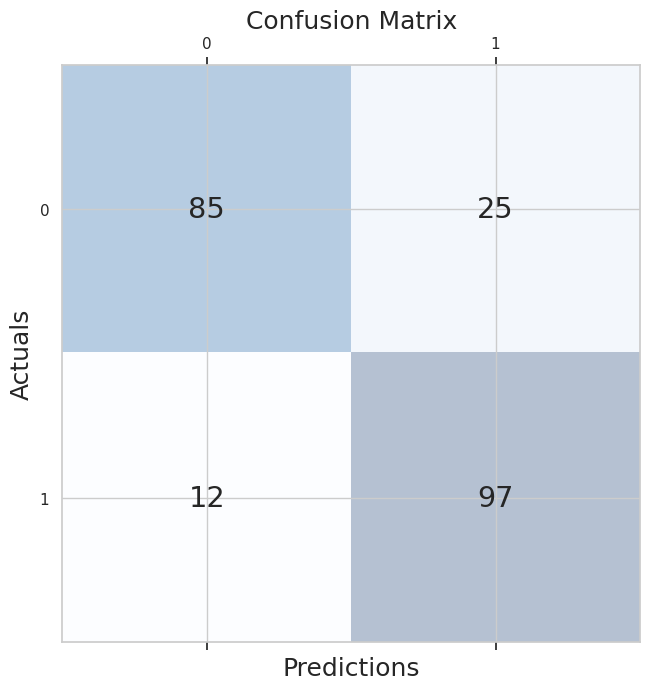

In [66]:
conf_matrix=confusion_matrix(y_test, y_pred) 
fig, ax = plt.subplots(figsize=(7.5, 7.5))
ax.matshow(conf_matrix, cmap=plt.cm.Blues, alpha=0.3)
for i in range(conf_matrix.shape[0]):
    for j in range(conf_matrix.shape[1]):
        ax.text(x=j, y=i,s=conf_matrix[i, j], va='center', 
                ha='center', size='xx-large')
 
plt.xlabel('Predictions', fontsize=18)
plt.ylabel('Actuals', fontsize=18)
plt.title('Confusion Matrix', fontsize=18)
plt.show()

Best hyperparameters: {'var_smoothing': 1e-09}
Accuracy of Naive Bayes on training set: 86.05
Accuracy of Naive Bayes on validation set: 85.84
ROC AUC of Naive Bayes on testing set: 0.94


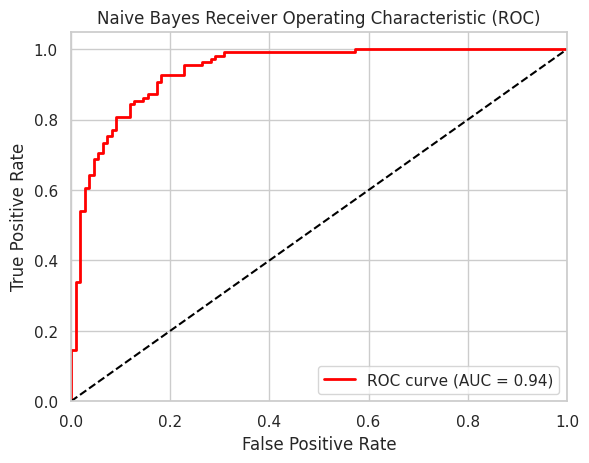

Classification Report for Naive Bayes on training set:
               precision    recall  f1-score   support

           0       0.86      0.86      0.86       254
           1       0.86      0.86      0.86       255

    accuracy                           0.86       509
   macro avg       0.86      0.86      0.86       509
weighted avg       0.86      0.86      0.86       509

Classification Report for Naive Bayes on validation set:
               precision    recall  f1-score   support

           0       0.87      0.85      0.86       110
           1       0.85      0.87      0.86       109

    accuracy                           0.86       219
   macro avg       0.86      0.86      0.86       219
weighted avg       0.86      0.86      0.86       219



In [67]:
from sklearn.metrics import accuracy_score

# Feature selection
selector = SelectKBest(f_classif, k=10)
X_train_selected = selector.fit_transform(X_train, y_train)
X_test_selected = selector.transform(X_test)

# Hyperparameter tuning using GridSearchCV
nb = GaussianNB()
param_grid = {'var_smoothing': [1e-9, 1e-8, 1e-7, 1e-6, 1e-5]}
grid_search = GridSearchCV(nb, param_grid=param_grid, cv=5, n_jobs=-1)
grid_search.fit(X_train_selected, y_train)
print("Best hyperparameters:", grid_search.best_params_)

# Fitting the model with best hyperparameters
nb = GaussianNB(var_smoothing=grid_search.best_params_['var_smoothing'])
nb.fit(X_train_selected, y_train)

# Predict on training set
y_train_pred = nb.predict(X_train_selected)
# Predict on validation set
y_test_pred = nb.predict(X_test_selected)

# Compute accuracy on training set
train_accuracy = accuracy_score(y_train, y_train_pred)
# Compute accuracy on validation set
test_accuracy = accuracy_score(y_test, y_test_pred)

# Print accuracy on training set and validation set
print('Accuracy of Naive Bayes on training set: {:.2f}'.format(train_accuracy * 100))
print('Accuracy of Naive Bayes on validation set: {:.2f}'.format(test_accuracy * 100))

# Get predicted probabilities for positive class on testing set
y_probs = nb.predict_proba(X_test_selected)[:, 1]

# Compute ROC curve and AUC on testing set
fpr, tpr, thresholds = roc_curve(y_test, y_probs)
roc_auc = auc(fpr, tpr)

#  ROC AUC

print('ROC AUC of Naive Bayes on testing set: {:.2f}'.format(roc_auc))

# Plot ROC curve
plt.figure()
plt.plot(fpr, tpr, color='red', lw=2, label='ROC curve (AUC = {:.2f})'.format(roc_auc))
plt.plot([0, 1], [0, 1], color='black', linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Naive Bayes Receiver Operating Characteristic (ROC)')
plt.legend(loc="lower right")
plt.show()


# Generate classification report
report_train = classification_report(y_train, y_train_pred)
report_test = classification_report(y_test, y_test_pred)

# Print classification report for training set
print('Classification Report for Naive Bayes on training set:\n', report_train)

# Print classification report for validation set
print('Classification Report for Naive Bayes on validation set:\n', report_test)

In [50]:
# Find the cross-validation score
scores = cross_val_score(nb, X_train, y_train, cv=5)
print("Cross-validation scores:", scores)

# Print the mean and standard deviation of the cross-validation scores
print("Mean CV score:", np.mean(scores))
print("Std CV score:", np.std(scores))

Cross-validation scores: [0.80392157 0.88235294 0.87254902 0.92156863 0.85148515]
Mean CV score: 0.8663754610755193
Std CV score: 0.03863130440445134
